In [1]:
import matplotlib.pyplot as plt   # our plotting module
import matplotlib as mpl
import pandas as pd               # the main HDF5 reader
import numpy as np                # must have
import seaborn as sns              # beautiful statistical plots!
import sys, itertools, collections 
import os 

import csv, math

get_ipython().magic(u'pylab inline')
import matplotlib.pylab as pylab
pylab.rcParams['figure.figsize'] = 14, 10

from sklearn.preprocessing import scale
from sklearn.decomposition import PCA as sklearnPCA
from IPython.display import display, HTML

from datetime import datetime

Populating the interactive namespace from numpy and matplotlib


Solar flare data

In [116]:
# date, GOES class, GOES duration, full duration (hrs), cme speed (km/s), log(gamma ray fluence), sep Emax, HXR Emax
# new list : Alexandre Lillo
SF_data = [
['2011 Mar 07', 3.7e-5, -(datetime(2011,3,7,19,43,0) - datetime(2011,3,7,20,58)).total_seconds(), 15.8, 2125, np.log10(1.076), 50, 105],
['2011 Jun 07', 2.5e-5, -(datetime(2011,6,7,6,16,0) - datetime(2011,6,7,6,59,0)).total_seconds(), 6, 1255, np.log10(0.295), 100, 100],
['2011 Aug 04', 9.3e-5, -(datetime(2011,8,4,3,41,0) - datetime(2011,8,4,4,4,0)).total_seconds(), 2.3, 1315, np.log10(0.13), 100, 300],
['2011 Aug 09', 6.9e-4, -(datetime(2011,8,9,7,48,0) - datetime(2011,8,9,8,8,0)).total_seconds(), 0.87, 1610, np.log10(0.037), 100, 300],
['2011 Sep 06', 2.1e-4, -(datetime(2011,9,6,22,12,0) - datetime(2011,9,6,22,24,0)).total_seconds(), 2, 575, np.log10(0.87), 100, 1000],
['2011 Sep 07', 1.8e-4, -(datetime(2011,9,7,22,32,0) - datetime(2011,9,7,22,44,0)).total_seconds(), 2.02, 792, np.log10(0.041), 50, 500],
['2011 Sep 24', 1.9e-4, -(datetime(2011,9,24,9,21,0) - datetime(2011,9,24,9,48,0)).total_seconds(), 1.2, 1936, np.log10(0.014), 50, 1000],
['2012 Jan 23', 8.7e-5, -(datetime(2012,1,23,3,38,0) - datetime(2012,1,23,4,34,0)).total_seconds(), 5.9, 2175, np.log10(0.34), 100, 105],
['2012 Jan 27', 1.7e-4, -(datetime(2012,1,27,17,37,0) - datetime(2012,1,27,18,56,0)).total_seconds(), 6.8, 2508, np.log10(0.248), 605, 105],
['2012 Mar 05', 1.1e-4, -(datetime(2012,3,5,2,30,0) - datetime(2012,3,5,4,43,0)).total_seconds(), 4.4, 1531, np.log10(0.085), 40, 105],
['2012 Mar 07', 5.4e-4, -(datetime(2012,3,7,0,2,0) - datetime(2012,3,7,0,40,0)).total_seconds(), 20.3, 2684, np.log10(33.996), 605, 1000],
['2012 Mar 09', 6.3e-5, -(datetime(2012,3,9,3,22,0) - datetime(2012,3,9,4,18,0)).total_seconds(), 7.2, 950, np.log10(0.148), 100, 105],
['2012 Mar 10', 8.4e-5, -(datetime(2012,3,10,17,15,0) - datetime(2012,3,10,18,30,0)).total_seconds(), 6, 1296, np.log10(0.042), 100, 55],
['2012 May 17', 5.1e-5, -(datetime(2012,5,17,1,25,0) - datetime(2012,5,17,2,14,0)).total_seconds(), 2.6, 1582, np.log10(0.0572), 605, 105],
#['2012 Jun 03', 3.3e-5, -(datetime(2012,6,3,17,48,0) - datetime(2012,6,3,17,57,0)).total_seconds(), 1.9, 605, np.log10(0.117), /, 100],
#['2012 Jul 06', 1.1e-4, -(datetime(2012,7,6,23,1,0) - datetime(2012,7,6,23,14,0)).total_seconds(), 1.27, 1828, np.log10(0.1), 100, /],
#['2012 Oct 23', 1.8e-4, -(datetime(2012,10,23,3,13,0) - datetime(2012,10,23,3,21,0)).total_seconds(), 1.9, /, np.log10(0.047), /, 1000],
#['2012 Nov 13', 6e-5, -(datetime(2012,11,13,1,58,0) - datetime(2012,11,27,2,4,0)).total_seconds(), 0.041, 851, np.log10(0.006), /, 100],
#['2012 Nov 27', 1.6e-5, -(datetime(2012,11,27,15,52,0) - datetime(2012,11,27,16,3,0)).total_seconds(), 0.166, /, np.log10(0.005), /, 500],
['2013 Apr 11', 6.5e-5, -(datetime(2013,4,11,6,55,0) - datetime(2013,4,11,7,29,0)).total_seconds(), 0.38, 861, np.log10(0.099), 100, 100],
['2013 May 13a', 1.7e-4, -(datetime(2013,5,13,1,53,0) - datetime(2013,5,13,2,32,0)).total_seconds(), 4, 1270, np.log10(0.11), 60, 305],
['2013 May 13b', 2.8e-4, -(datetime(2013,5,13,15,48,0) - datetime(2013,5,13,16,16,0)).total_seconds(), 6.1, 1850, np.log10(0.35), 60, 800],
['2013 May 14', 3.2e-4, -(datetime(2013,5,14,0,0,0) - datetime(2013,5,14,1,20,0)).total_seconds(), 5.9, 2625, np.log10(0.401), 60, 500],
['2013 May 15', 1.2e-4, -(datetime(2013,5,15,1,25,0) - datetime(2013,5,15,1,58,0)).total_seconds(), 3.5, 1366, np.log10(0.052), 50, 100],
['2013 Oct 11', 4.9e-5, -(datetime(2013,10,11,7,1,0) - datetime(2013,10,11,7,45,0)).total_seconds(), 0.38, 1200, np.log10(0.262), 60, 10],
['2013 Oct 25', 1.7e-4, -(datetime(2013,10,25,7,53,0) - datetime(2013,10,25,8,9,0)).total_seconds(), 1.4, 587, np.log10(0.042), 60, 300],
['2013 Oct 28', 2.7e-5, -(datetime(2013,10,28,14,46,0) - datetime(2013,10,28,15,4,0)).total_seconds(), 1.6, 812, np.log10(0.036), 60, 50],
['2014 Jan 06', 3.5e-4, -(datetime(2014,1,6,7,40,0) - datetime(2014,1,6,8,8,0)).total_seconds(), 0.27, 1402, np.log10(0.0061), 605, 6],
['2014 Jan 07', 1.2e-4, -(datetime(2014,1,7,18,4,0) - datetime(2014,1,7,18,58,0)).total_seconds(), 1.05, 1830, np.log10(0.0081), 100, 25],
['2014 Feb 25', 4.9e-4, -(datetime(2014,2,25,0,39,0) - datetime(2014,2,25,1,3,0)).total_seconds(), 8.4, 2147, np.log10(13.95), 100, 7000],
['2014 Jun 10', 1.5e-4, -(datetime(2014,6,10,12,36,0) - datetime(2014,6,10,13,3,0)).total_seconds(), 1.9, 1469, np.log10(0.064), 60, 1000],
['2014 Jun 11', 1e-4, -(datetime(2014,6,11,8,59,0) - datetime(2014,6,11,9,10,0)).total_seconds(), 0.23, 829, np.log10(0.007), 0, 1000],
['2014 Sep 01', 2.1e-4, -(datetime(2014,9,1,10,58,0) - datetime(2014,9,1,11,34,0)).total_seconds(), 2.5, 1901, np.log10(12.1), 100, 100],
['2014 Sep 10',  1.6e-4, -(datetime(2014,9,10,17,21,0) - datetime(2014,9,10,18,20,0)).total_seconds(), 0.3, 1071, np.log10(0.172), 100, 100],
['2015 Jun 21', 2.6e-5, -(datetime(2015,6,21,2,3,0) - datetime(2015,6,21,3,15,0)).total_seconds(), 11.5, 1366, np.log10(0.296), 10, 55],
['2015 Jun 25', 7.9e-5, -(datetime(2015,6,25,8,2,0) - datetime(2015,6,25,9,5,0)).total_seconds(), 2.4, 1627, np.log10(0.03), 10, 1000],
['2017 Sep 06a', 2.2e-4, -(datetime(2017,9,6,8,57,0) - datetime(2017,9,6,9,17,0)).total_seconds(), 0.169, 391, np.log10(0.02), 0, 300],
['2017 Sep 06b', 9.3e-4, -(datetime(2017,9,6,11,53,0) - datetime(2017,9,6,12,10,0)).total_seconds(), 13.33, 1571, np.log10(1.07), 100, 305],
['2017 Sep 10', 8.2e-4, -(datetime(2017,9,10,15,35,0) - datetime(2017,9,10,16,31,0)).total_seconds(), 13.9, 3163, np.log10(22.2), 605, 3000]
]

flare_type = ['lightgreen', # '2011 Mar 07'
    'lightgreen', #'2011 Jun 07'
    'lightgreen', #'2011 Aug 04'
    'navy', #'2011 Aug 09'
    'navy', #'2011 Sep 06'
    'lightgreen', #'2011 Sep 07'
    'navy', #'2011 Sep 24'
    'lightgreen', #'2012 Jan 23'
    'lightgreen', #'2012 Jan 27'
    'lightgreen', #'2012 Mar 05'
    'lightgreen', #'2012 Mar 07'
    'Crimson',#'2012 Mar 09'
    'lightgreen', #'2012 Mar 10'
    'lightgreen', #'2012 May 17'
    'Crimson', #'2013 Apr 11'
    'lightgreen', #'2013 May 13a'
    'lightgreen', #'2013 May 13b'
    'Crimson', #'2013 May 14'
    'Crimson', #'2013 May 15'
    'DarkGreen', #'2013 Oct 11'
    'lightgreen', #'2013 Oct 25'
    'lightgreen', #'2013 Oct 28'
    'DarkGreen', #'2014 Jan 06'
    'lightgreen', #'2014 Jan 07'
    'purple', #'2014 Feb 25'
    'purple', #'2014 Jun 10'
    'DarkGreen', #'2014 Jun 11'
    'lightgreen', #'2014 Sep 01'
    'DarkGreen', #'2014 Sep 10'
    'purple', #'2015 Jun 21'
    'lightgreen', #'2015 Jun 25'
    'orange', #'2017 Sep 06a'
    'lightgreen', #'2017 Sep 06b'
    'purple' #'2017 Sep 10'
] # delayed = lightgreen, short delayed = DarkGreen, delayed only = Crimson, prompt = orange, prompt delayed = purple, prompt short delayed = navy

active_region = ['grey', # '2011 Mar 07'
    'grey', #'2011 Jun 07'
    'grey', #'2011 Aug 04'
    'grey', #'2011 Aug 09'
    'red', #'2011 Sep 06' -- 11283
    'red', #'2011 Sep 07' -- 11283
    'grey', #'2011 Sep 24'
    'red', #'2012 Jan 23' -- 11402
    'red', #'2012 Jan 27' -- 11402
    'gold', #'2012 Mar 05' -- 11429
    'gold', #'2012 Mar 07' -- 11429
    'gold', #'2012 Mar 09' -- 11429
    'gold', #'2012 Mar 10' -- 11429
    'grey', #'2012 May 17'
    'grey', #'2013 Apr 11'
    'gold', #'2013 May 13a' -- 11748
    'gold', #'2013 May 13b' -- 11748
    'gold', #'2013 May 14' -- 11748
    'gold', #'2013 May 15' -- 11748
    'grey', #'2013 Oct 11'
    'red', #'2013 Oct 25' -- 11882
    'red', #'2013 Oct 28' -- 11882
    'grey', #'2014 Jan 06'
    'grey', #'2014 Jan 07'
    'grey', #'2014 Feb 25'
    'red', #'2014 Jun 10' -- 12087
    'red', #'2014 Jun 11' -- 12087
    'grey', #'2014 Sep 01'
    'grey', #'2014 Sep 10'
    'red', #'2015 Jun 21' -- 12371
    'red', #'2015 Jun 25' -- 12371
    'red', #'2017 Sep 06a' -- 12673
    'red', #'2017 Sep 06b' -- 12673
    'red' #'2017 Sep 10' -- 12673
] # from a cluster = red, outside = grey, notable = gold

flare_type25 = ['lightgreen', # '2011 Mar 07' #pour les scatter.matrix sans le 25/02/14, ni le 10/09/17
    'lightgreen', #'2011 Jun 07'
    'lightgreen', #'2011 Aug 04'
    'navy', #'2011 Aug 09'
    'navy', #'2011 Sep 06'
    'lightgreen', #'2011 Sep 07'
    'navy', #'2011 Sep 24'
    'lightgreen', #'2012 Jan 23'
    'lightgreen', #'2012 Jan 27'
    'lightgreen', #'2012 Mar 05'
    'lightgreen', #'2012 Mar 07'
    'Crimson',#'2012 Mar 09'
    'lightgreen', #'2012 Mar 10'
    'lightgreen', #'2012 May 17'
    'Crimson', #'2013 Apr 11'
    'lightgreen', #'2013 May 13a'
    'lightgreen', #'2013 May 13b'
    'Crimson', #'2013 May 14'
    'Crimson', #'2013 May 15'
    'DarkGreen', #'2013 Oct 11'
    'lightgreen', #'2013 Oct 25'
    'lightgreen', #'2013 Oct 28'
    'DarkGreen', #'2014 Jan 06'
    'lightgreen', #'2014 Jan 07'
    'purple', #'2014 Jun 10'
    'DarkGreen', #'2014 Jun 11'
    'lightgreen', #'2014 Sep 01'
    'DarkGreen', #'2014 Sep 10'
    'purple', #'2015 Jun 21'
    'lightgreen', #'2015 Jun 25'
    'orange', #'2017 Sep 06a'
    'lightgreen', #'2017 Sep 06b'
] # delayed = lightgreen, short delayed = DarkGreen, delayed only = Crimson, prompt = orange, prompt delayed = purple, prompt short delayed = navy

active_region25 = ['grey', # '2011 Mar 07'
    'grey', #'2011 Jun 07'
    'grey', #'2011 Aug 04'
    'grey', #'2011 Aug 09'
    'red', #'2011 Sep 06' -- 11283
    'red', #'2011 Sep 07' -- 11283
    'grey', #'2011 Sep 24'
    'red', #'2012 Jan 23' -- 11402
    'red', #'2012 Jan 27' -- 11402
    'gold', #'2012 Mar 05' -- 11429
    'gold', #'2012 Mar 07' -- 11429
    'gold', #'2012 Mar 09' -- 11429
    'gold', #'2012 Mar 10' -- 11429
    'grey', #'2012 May 17'
    'grey', #'2013 Apr 11'
    'gold', #'2013 May 13a' -- 11748
    'gold', #'2013 May 13b' -- 11748
    'gold', #'2013 May 14' -- 11748
    'gold', #'2013 May 15' -- 11748
    'grey', #'2013 Oct 11'
    'red', #'2013 Oct 25' -- 11882
    'red', #'2013 Oct 28' -- 11882
    'grey', #'2014 Jan 06'
    'grey', #'2014 Jan 07'
    'red', #'2014 Jun 10' -- 12087
    'red', #'2014 Jun 11' -- 12087
    'grey', #'2014 Sep 01'
    'grey', #'2014 Sep 10'
    'red', #'2015 Jun 21' -- 12371
    'red', #'2015 Jun 25' -- 12371
    'red', #'2017 Sep 06a' -- 12673
    'red', #'2017 Sep 06b' -- 12673
] # from a cluster = red, outside = grey, notable = gold

column = ['Date', 'GOES class', 'GOES [s]', 'Duration [hrs]', 'CME [km/s]', 'log(Fluence)', 'SEP [MeV]', 'HXR [keV]']

In [117]:
f = open("solar_flare_data.txt", "w")
i = 0 
f.writelines(['Date',',', 'GOES class',',', 'GOES [s]',',', 'Duration [hrs]',',', 'CME [km/s]',',', 'log(Fluence)',',', 'SEP [MeV]',',', 'HXR [keV]'])
f.write('\n')
while i < len(SF_data) :
    L = [str(SF_data[i][0]),',', str(SF_data[i][1]),',', str(SF_data[i][2]),',', str(SF_data[i][3]),',', str(SF_data[i][4]),',', str(SF_data[i][5]),',', str(SF_data[i][6]),',', str(SF_data[i][7])]
    f.writelines(L)
    f.write('\n')
    i += 1
f.close()



In [118]:
i = 0 
GOES_class = []
GOES = [] 
Duration = []
CME = []
log_Gamma_fluence = [] 
SEP_Emax = []
HXR_Emax = []
date = [] 
DATE = [] 
while i < len(SF_data) :
    DATE.append(SF_data[i][0])
    date.append(i)
    GOES_class.append(SF_data[i][1])
    GOES.append(SF_data[i][2])
    Duration.append(SF_data[i][3])
    CME.append(SF_data[i][4])
    log_Gamma_fluence.append(SF_data[i][5])
    SEP_Emax.append(SF_data[i][6])
    HXR_Emax.append(SF_data[i][7])
    i += 1

In [119]:
SF_data25 = SF_data[:24] + SF_data[25:-1]

In [114]:
pylab.rcParams['figure.figsize'] = 18, 10

Text(0, 0.5, 'GOES class')

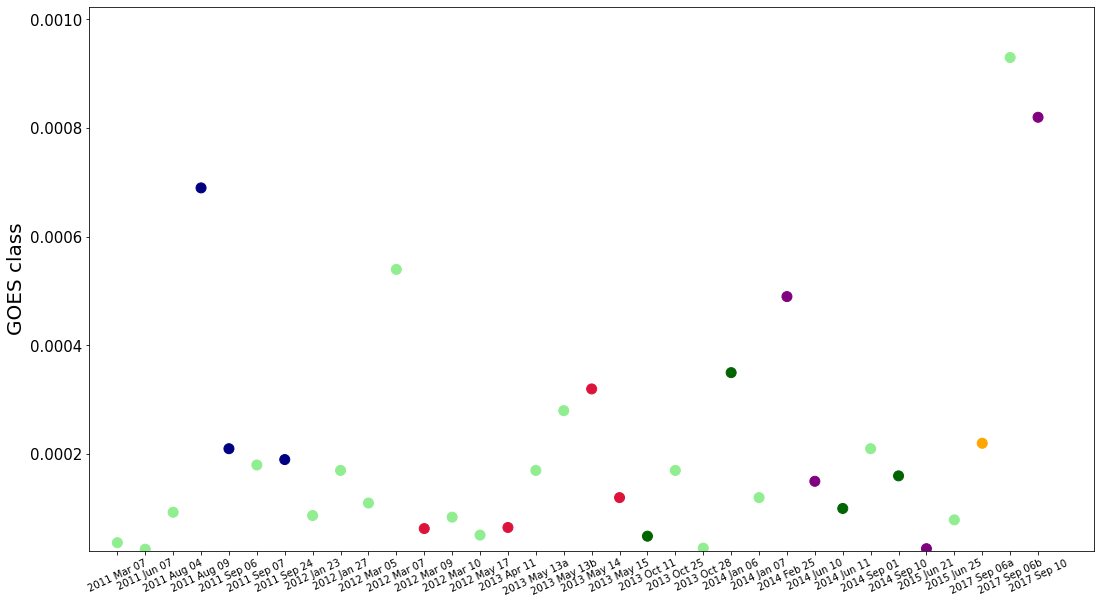

In [7]:
plt.scatter(date, GOES_class, color = flare_type, s = 100)
v = [-1, len(SF_data) + 1, min(GOES_class) * 0.9, max(GOES_class) * 1.1]
axis(v)
pylab.xticks(date, DATE, size = 10, rotation = 25)
pylab.yticks(size = 15)
pylab.ylabel('GOES class', size = 20)

Text(0, 0.5, 'GOES duration [s]')

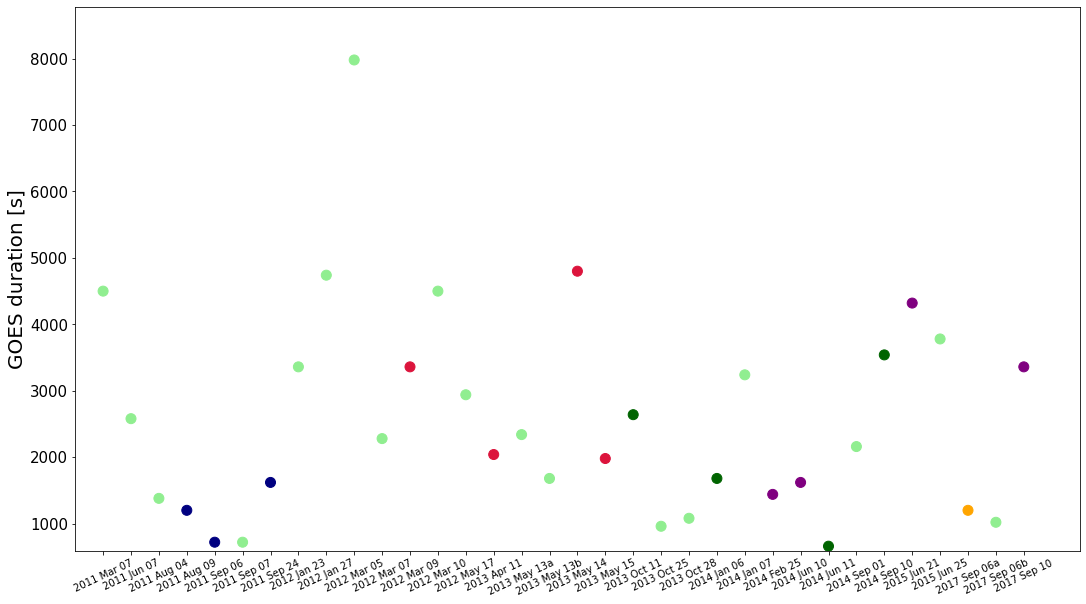

In [8]:
X_param = GOES
plt.scatter(date, X_param, color = flare_type, s = 100)
v = [-1, len(SF_data) + 1, min(X_param) * 0.9, max(X_param) * 1.1]
axis(v)
pylab.xticks(date, DATE, size = 10, rotation = 25)
pylab.yticks(size = 15)
pylab.ylabel('GOES duration [s]', size = 20)

Text(0, 0.5, 'Total duration [hrs]')

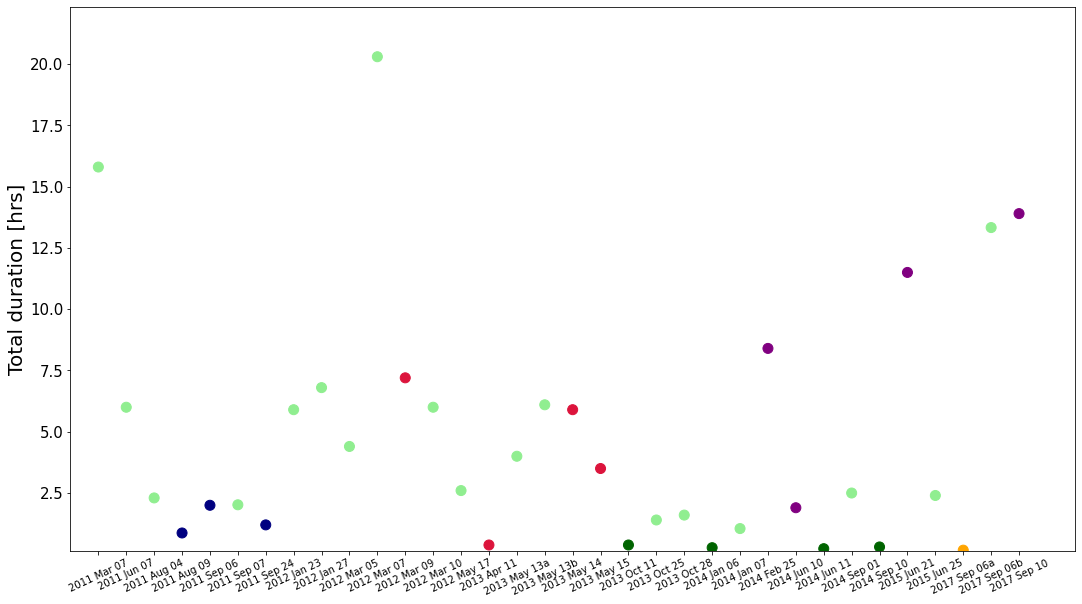

In [9]:
X_param = Duration
plt.scatter(date, X_param, color = flare_type, s = 100)
v = [-1, len(SF_data) + 1, min(X_param) * 0.9, max(X_param) * 1.1]
axis(v)
pylab.xticks(date, DATE, size = 10, rotation = 25)
pylab.yticks(size = 15)
pylab.ylabel('Total duration [hrs]', size = 20)

Text(0, 0.5, 'CME [km/s]')

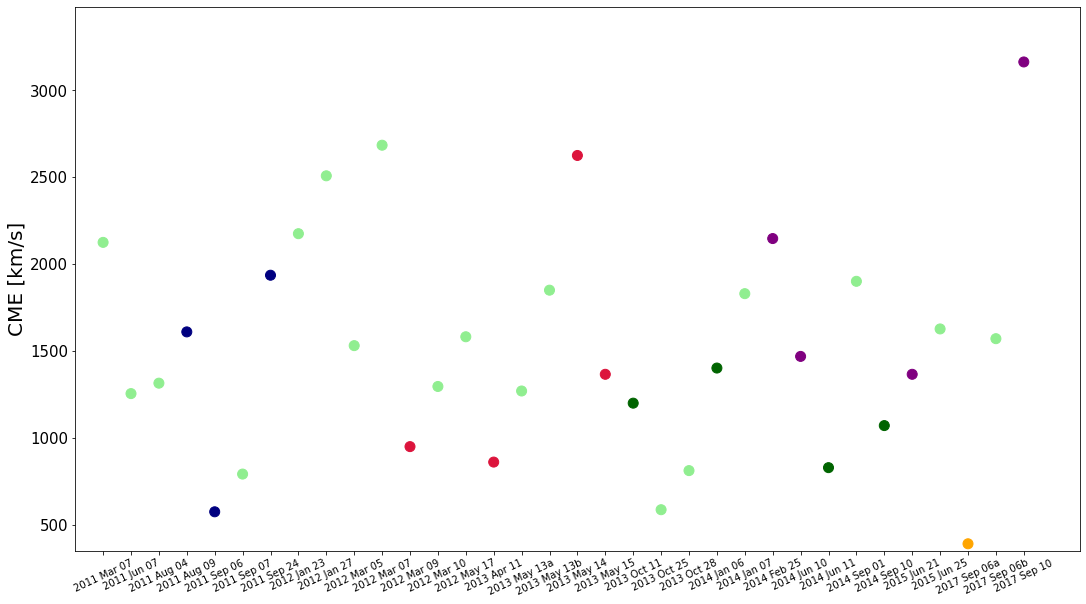

In [10]:
X_param = CME
plt.scatter(date, X_param, color = flare_type, s = 100)
v = [-1, len(SF_data) + 1, min(X_param) * 0.9, max(X_param) * 1.1]
axis(v)
pylab.xticks(date, DATE, size = 10, rotation = 25)
pylab.yticks(size = 15)
pylab.ylabel('CME [km/s]', size = 20)

Text(0, 0.5, 'log(Gamma fluence)')

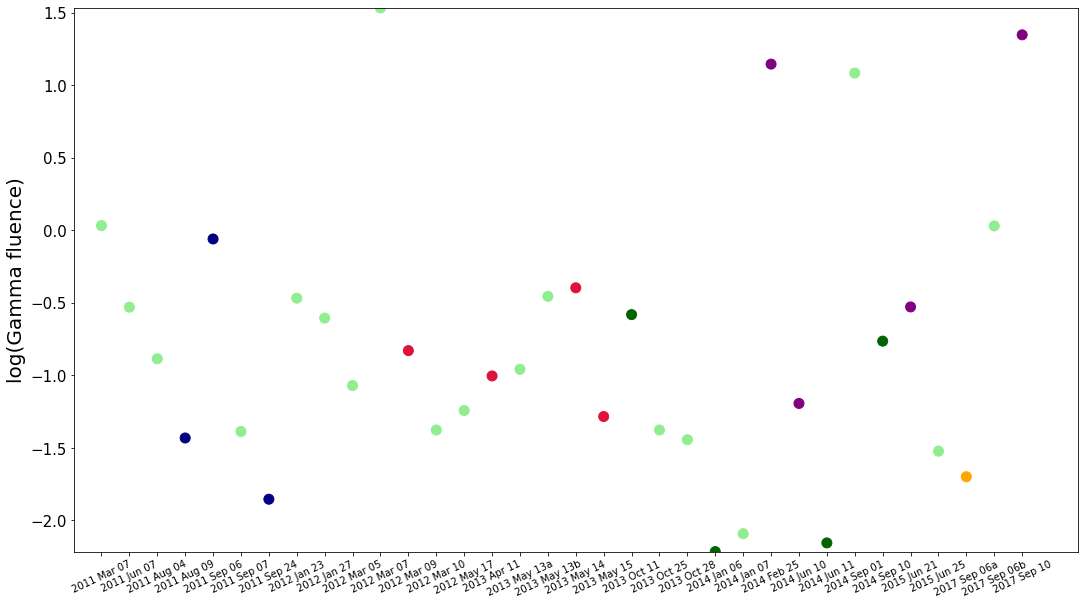

In [11]:
X_param = log_Gamma_fluence
plt.scatter(date, X_param, color = flare_type, s = 100)
v = [-1, len(SF_data) + 1, min(X_param), max(X_param)]
axis(v)
pylab.xticks(date, DATE, size = 10, rotation = 25)
pylab.yticks(size = 15)
pylab.ylabel('log(Gamma fluence)', size = 20)

Text(0, 0.5, 'SEP Emax [MeV]')

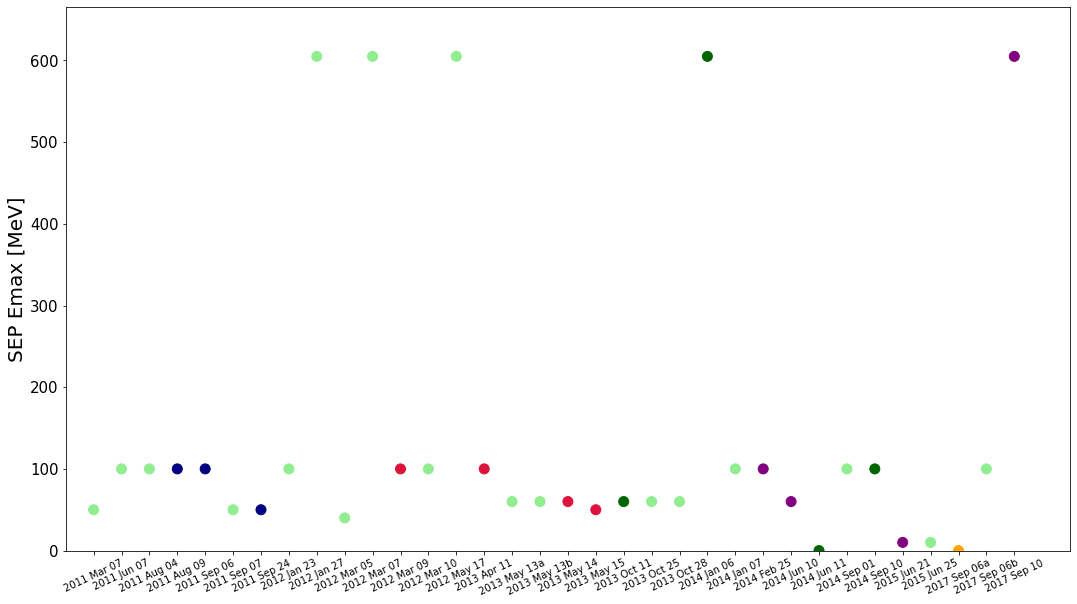

In [12]:
X_param = SEP_Emax
plt.scatter(date, X_param, color = flare_type, s = 100)
v = [-1, len(SF_data) + 1, min(X_param) * 0.9, max(X_param) * 1.1]
axis(v)
pylab.xticks(date, DATE, size = 10, rotation = 25)
pylab.yticks(size = 15)
pylab.ylabel('SEP Emax [MeV]', size = 20)

Text(0, 0.5, 'HXR Emax [keV]')

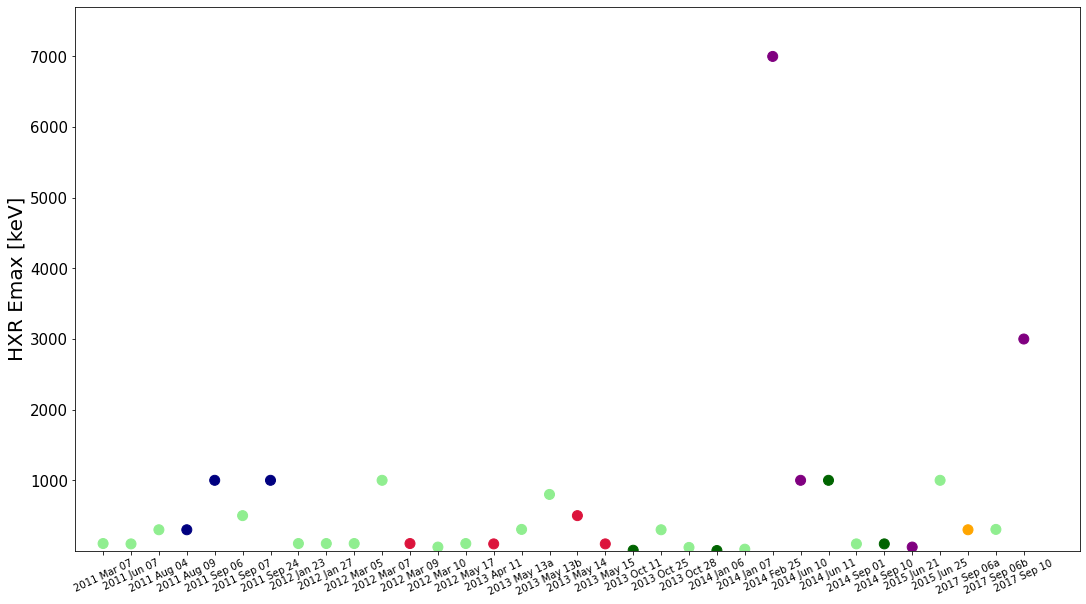

In [13]:
X_param = HXR_Emax
plt.scatter(date, X_param, color = flare_type, s = 100)
v = [-1, len(SF_data) + 1, min(X_param) * 0.9, max(X_param) * 1.1]
axis(v)
pylab.xticks(date, DATE, size = 10, rotation = 25)
pylab.yticks(size = 15)
pylab.ylabel('HXR Emax [keV]', size = 20)

Text(0.5, 0, 'GOES class [W/m²]')

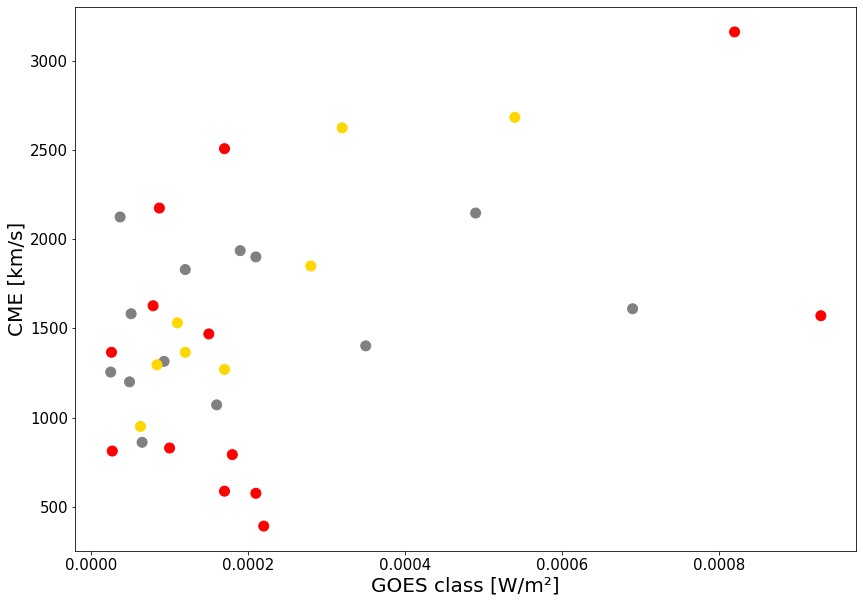

In [14]:
pylab.rcParams['figure.figsize'] = 14, 10
plt.scatter(GOES_class, CME, marker = 'o', color = active_region, s = 100)
pylab.xticks(size = 15)
pylab.yticks(size = 15)
pylab.ylabel('CME [km/s]', size = 20)
pylab.xlabel('GOES class [W/m²]', size = 20)

Text(0.5, 0, 'SEP [MeV]')

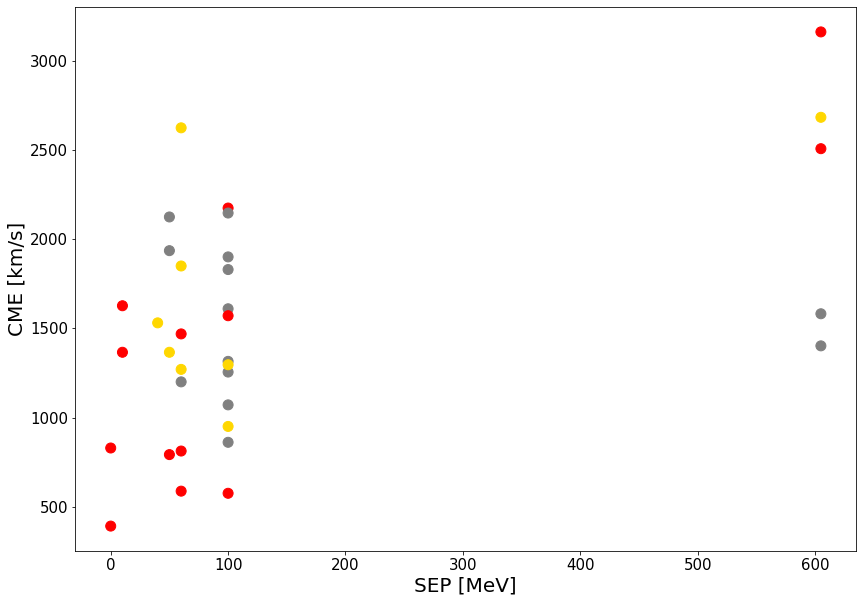

In [15]:
plt.scatter(SEP_Emax, CME, marker = 'o', color = active_region, s = 100)
pylab.xticks(size = 15)
pylab.yticks(size = 15)
pylab.ylabel('CME [km/s]', size = 20)
pylab.xlabel('SEP [MeV]', size = 20)

Text(0.5, 0, 'HXR [keV]')

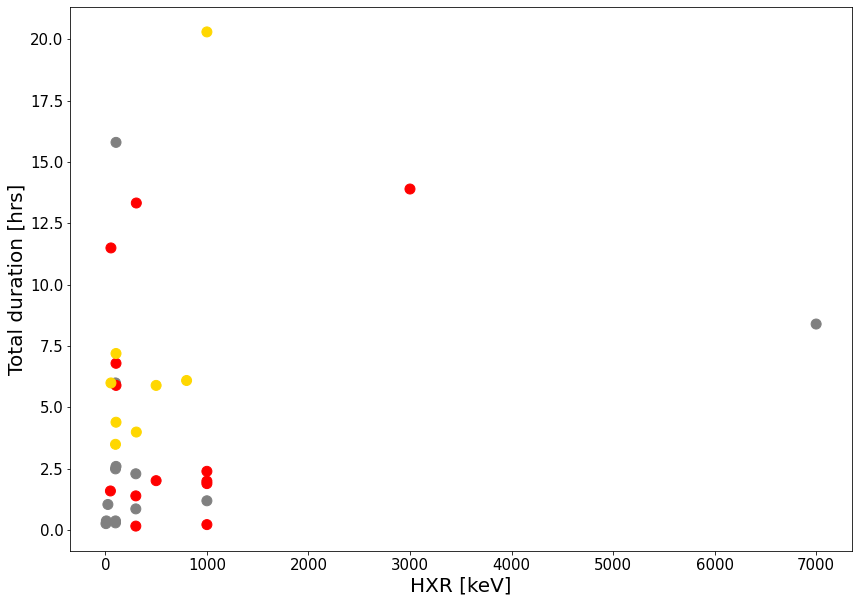

In [16]:
plt.scatter(HXR_Emax, Duration, marker = 'o', color = active_region, s = 100)
pylab.xticks(size = 15)
pylab.yticks(size = 15)
pylab.ylabel('Total duration [hrs]', size = 20)
pylab.xlabel('HXR [keV]', size = 20)

Text(0, 0.5, 'Total duration [hrs]')

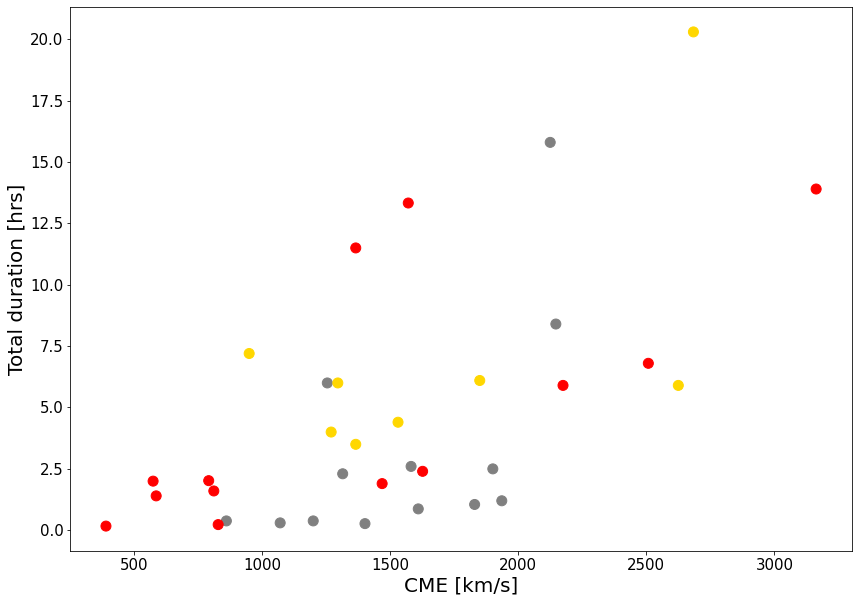

In [17]:
plt.scatter(CME, Duration, marker = 'o', color = active_region, s = 100)
pylab.xticks(size = 15)
pylab.yticks(size = 15)
pylab.xlabel('CME [km/s]', size = 20)
pylab.ylabel('Total duration [hrs]', size = 20)

In [18]:
i = 0 
while i < len(SF_data) :
    print(SF_data[i])
    i += 1

['2011 Mar 07', 3.7e-05, 4500.0, 15.8, 2125, 0.0318122713303704, 50, 105]
['2011 Jun 07', 2.5e-05, 2580.0, 6, 1255, -0.530177984021837, 100, 100]
['2011 Aug 04', 9.3e-05, 1380.0, 2.3, 1315, -0.8860566476931632, 100, 300]
['2011 Aug 09', 0.00069, 1200.0, 0.87, 1610, -1.431798275933005, 100, 300]
['2011 Sep 06', 0.00021, 720.0, 2, 575, -0.060480747381381476, 100, 1000]
['2011 Sep 07', 0.00018, 720.0, 2.02, 792, -1.3872161432802645, 50, 500]
['2011 Sep 24', 0.00019, 1620.0, 1.2, 1936, -1.853871964321762, 50, 1000]
['2012 Jan 23', 8.7e-05, 3360.0, 5.9, 2175, -0.46852108295774486, 100, 105]
['2012 Jan 27', 0.00017, 4740.0, 6.8, 2508, -0.6055483191737837, 605, 105]
['2012 Mar 05', 0.00011, 7980.0, 4.4, 1531, -1.0705810742857071, 40, 105]
['2012 Mar 07', 0.00054, 2280.0, 20.3, 2684, 1.531427820568062, 605, 1000]
['2012 Mar 09', 6.3e-05, 3360.0, 7.2, 950, -0.8297382846050426, 100, 105]
['2012 Mar 10', 8.4e-05, 4500.0, 6, 1296, -1.3767507096020994, 100, 55]
['2012 May 17', 5.1e-05, 2940.0, 2.6,

In [19]:
i = 0 
X = []
name = []
while i < len(SF_data) :
    X.append(SF_data[i][1:])
    name.append(SF_data[i][0])
    i += 1

In [20]:
X_scaled = scale(X) # vient de sklearn.preprocessing

Multivariate plots

In [120]:
from pandas import *
from pandas.plotting import scatter_matrix

array([[<AxesSubplot:xlabel='GOES class', ylabel='GOES class'>,
        <AxesSubplot:xlabel='GOES [s]', ylabel='GOES class'>,
        <AxesSubplot:xlabel='Duration [hrs]', ylabel='GOES class'>,
        <AxesSubplot:xlabel='CME [km/s]', ylabel='GOES class'>,
        <AxesSubplot:xlabel='log(Fluence)', ylabel='GOES class'>,
        <AxesSubplot:xlabel='SEP [MeV]', ylabel='GOES class'>,
        <AxesSubplot:xlabel='HXR [keV]', ylabel='GOES class'>],
       [<AxesSubplot:xlabel='GOES class', ylabel='GOES [s]'>,
        <AxesSubplot:xlabel='GOES [s]', ylabel='GOES [s]'>,
        <AxesSubplot:xlabel='Duration [hrs]', ylabel='GOES [s]'>,
        <AxesSubplot:xlabel='CME [km/s]', ylabel='GOES [s]'>,
        <AxesSubplot:xlabel='log(Fluence)', ylabel='GOES [s]'>,
        <AxesSubplot:xlabel='SEP [MeV]', ylabel='GOES [s]'>,
        <AxesSubplot:xlabel='HXR [keV]', ylabel='GOES [s]'>],
       [<AxesSubplot:xlabel='GOES class', ylabel='Duration [hrs]'>,
        <AxesSubplot:xlabel='GOES [s]', ylab

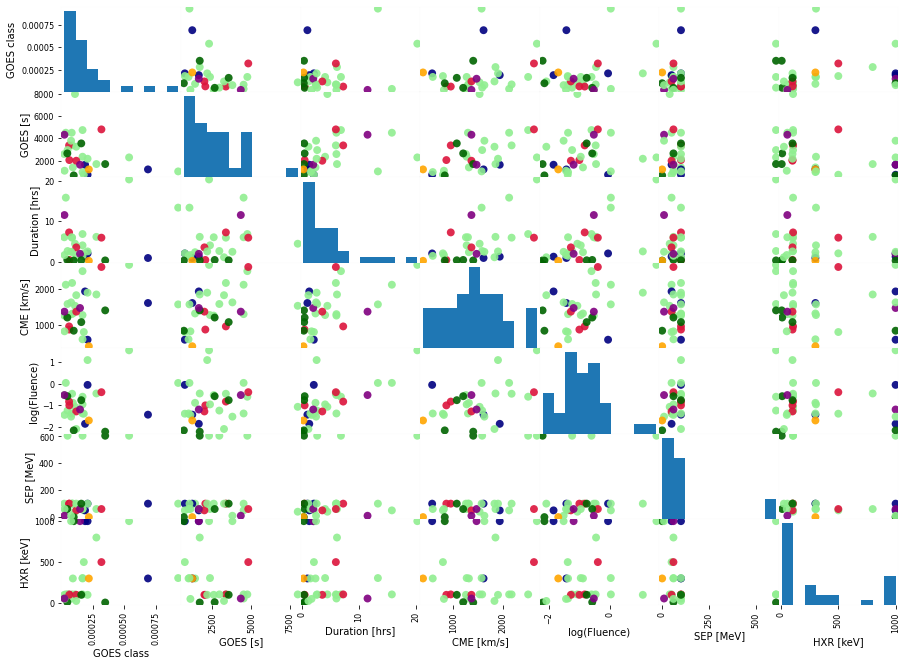

In [121]:
pylab.rcParams['figure.figsize'] = 15, 11
dg = pd.DataFrame(data = SF_data25, columns = column)
scatter_matrix(dg, alpha = 0.9, s = 250, diagonal = 'hist', color = flare_type25)

array([[<AxesSubplot:xlabel='GOES class', ylabel='GOES class'>,
        <AxesSubplot:xlabel='GOES [s]', ylabel='GOES class'>,
        <AxesSubplot:xlabel='Duration [hrs]', ylabel='GOES class'>,
        <AxesSubplot:xlabel='CME [km/s]', ylabel='GOES class'>,
        <AxesSubplot:xlabel='log(Fluence)', ylabel='GOES class'>,
        <AxesSubplot:xlabel='SEP [MeV]', ylabel='GOES class'>,
        <AxesSubplot:xlabel='HXR [keV]', ylabel='GOES class'>],
       [<AxesSubplot:xlabel='GOES class', ylabel='GOES [s]'>,
        <AxesSubplot:xlabel='GOES [s]', ylabel='GOES [s]'>,
        <AxesSubplot:xlabel='Duration [hrs]', ylabel='GOES [s]'>,
        <AxesSubplot:xlabel='CME [km/s]', ylabel='GOES [s]'>,
        <AxesSubplot:xlabel='log(Fluence)', ylabel='GOES [s]'>,
        <AxesSubplot:xlabel='SEP [MeV]', ylabel='GOES [s]'>,
        <AxesSubplot:xlabel='HXR [keV]', ylabel='GOES [s]'>],
       [<AxesSubplot:xlabel='GOES class', ylabel='Duration [hrs]'>,
        <AxesSubplot:xlabel='GOES [s]', ylab

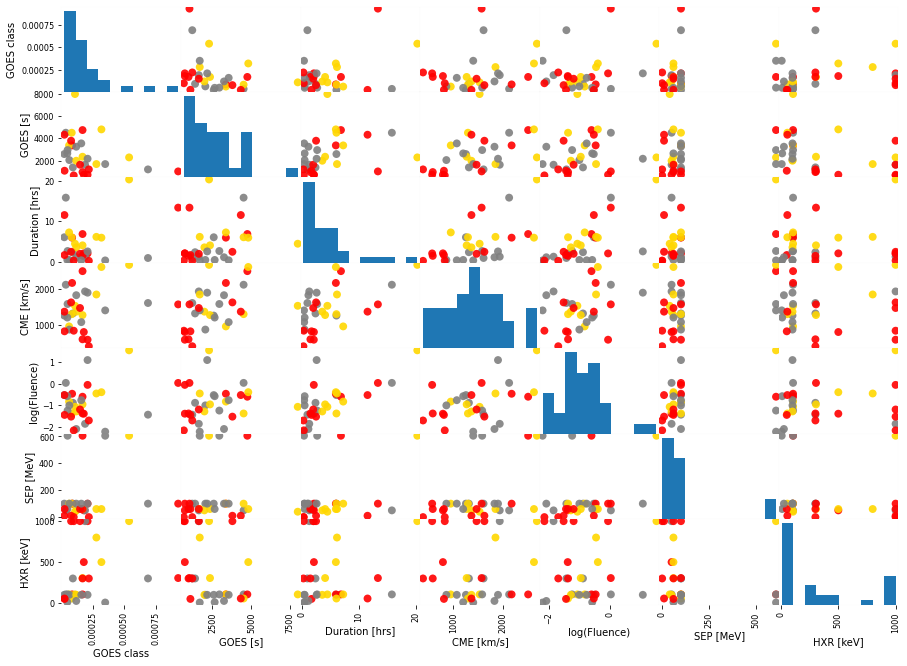

In [122]:
pylab.rcParams['figure.figsize'] = 15, 11
dg = pd.DataFrame(data = SF_data25, columns = column)
scatter_matrix(dg, alpha = 0.9, s = 250, diagonal = 'hist', color = active_region25)

array([[<AxesSubplot:xlabel='GOES class', ylabel='GOES class'>,
        <AxesSubplot:xlabel='GOES [s]', ylabel='GOES class'>,
        <AxesSubplot:xlabel='Duration [hrs]', ylabel='GOES class'>,
        <AxesSubplot:xlabel='CME [km/s]', ylabel='GOES class'>,
        <AxesSubplot:xlabel='log(Fluence)', ylabel='GOES class'>,
        <AxesSubplot:xlabel='SEP [MeV]', ylabel='GOES class'>,
        <AxesSubplot:xlabel='HXR [keV]', ylabel='GOES class'>],
       [<AxesSubplot:xlabel='GOES class', ylabel='GOES [s]'>,
        <AxesSubplot:xlabel='GOES [s]', ylabel='GOES [s]'>,
        <AxesSubplot:xlabel='Duration [hrs]', ylabel='GOES [s]'>,
        <AxesSubplot:xlabel='CME [km/s]', ylabel='GOES [s]'>,
        <AxesSubplot:xlabel='log(Fluence)', ylabel='GOES [s]'>,
        <AxesSubplot:xlabel='SEP [MeV]', ylabel='GOES [s]'>,
        <AxesSubplot:xlabel='HXR [keV]', ylabel='GOES [s]'>],
       [<AxesSubplot:xlabel='GOES class', ylabel='Duration [hrs]'>,
        <AxesSubplot:xlabel='GOES [s]', ylab

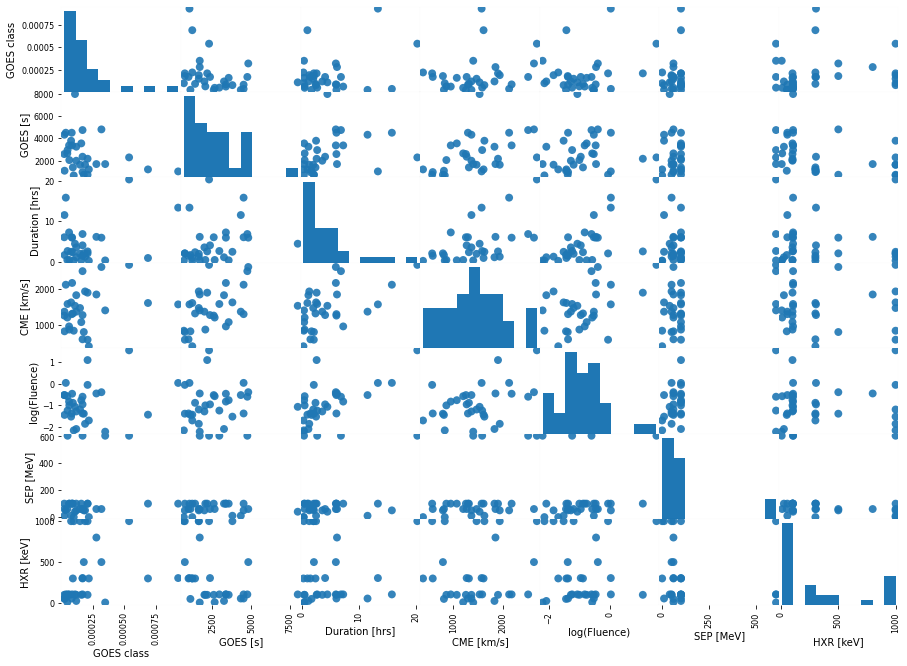

In [123]:
pylab.rcParams['figure.figsize'] = 15, 11
dg = pd.DataFrame(data = SF_data25, columns = column)
scatter_matrix(dg, alpha = 0.9, s = 250, diagonal = 'hist')

PCA and K-Means analysis


In [24]:
sklearn_pca = sklearnPCA(n_components = 2)
Y_sklearn = sklearn_pca.fit_transform(X_scaled)

In [25]:
XX = []
YY = [] 
i = 0 
while i < len(Y_sklearn) :
    XX.append(Y_sklearn[i][0])
    YY.append(Y_sklearn[i][1])
    i += 1 

In [26]:
print(len(XX), len(name))

34 34


(array([-4., -3., -2., -1.,  0.,  1.,  2.,  3.,  4.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

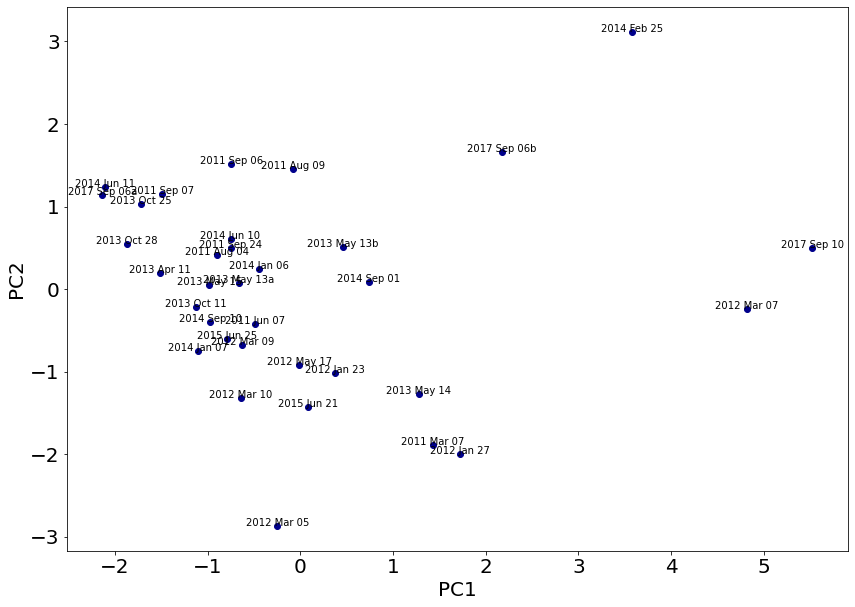

In [28]:
pylab.rcParams['figure.figsize'] = 14, 10
plt.plot(XX, YY, marker = 'o', linestyle = 'None', color = 'DarkBlue')
i = 0
while i < len(name) : 
    plt.annotate(name[i], # this is the text
                 (XX[i],YY[i]), # this is the point to label
                 textcoords = "offset points", # how to position the text
                 xytext = (0,0), # distance from text to points (x,y)
                 ha = 'center')
    i += 1
pylab.xlabel(r'PC1', size = 20)
pylab.ylabel(r'PC2', size = 20)
pylab.xticks(size = 20)
pylab.yticks(size = 20)

In [29]:
Z = []
COL = []
i = 0 
while i < len(X_scaled) :
    j = 0 
    z = []
    while j < len(X_scaled[i]) :
        z.append(X_scaled[i][j])    
        j += 1
    z.append(XX[i])
    z.append(YY[i])
    Z.append(z)
    i += 1
#print(Z)
i = 1
while i < len(column) :
    COL.append(column[i])
    i += 1
COL.append('PC1')
COL.append('PC2')
df = pd.DataFrame(data = Z, columns = COL)

In [30]:
df.corr()

,GOES class,GOES [s],Total duration [hrs],CME [km/s],log(Gamma fluence),SEP max energy [MeV],HXR max energy [keV],PC1,PC2
GOES class,1.000000,-0.235790,0.429352,0.444445,0.457424,0.347275,0.413189,6.763937e-01,4.705430e-01
GOES [s],-0.235790,1.000000,0.284630,0.404523,0.102183,0.098733,-0.177405,2.111244e-01,-8.828480e-01
Total duration [hrs],0.429352,0.284630,1.000000,0.614589,0.717852,0.339173,0.242714,8.197293e-01,-1.989135e-01
CME [km/s],0.444445,0.404523,0.614589,1.000000,0.572453,0.502006,0.334898,8.398663e-01,-2.793464e-01
log(Gamma fluence),0.457424,0.102183,0.717852,0.572453,1.000000,0.283685,0.470455,8.318454e-01,7.588096e-02
SEP max energy [MeV],0.347275,0.098733,0.339173,0.502006,0.283685,1.000000,0.086383,5.679729e-01,-1.468735e-01
HXR max energy [keV],0.413189,-0.177405,0.242714,0.334898,0.470455,0.086383,1.000000,5.336388e-01,5.361046e-01
PC1,0.676394,0.211124,0.819729,0.839866,0.831845,0.567973,0.533639,1.000000e+00,-6.119482e-17
PC2,0.470543,-0.882848,-0.198914,-0.279346,0.075881,-0.146874,0.536105,-6.119482e-17,1.000000e+00


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


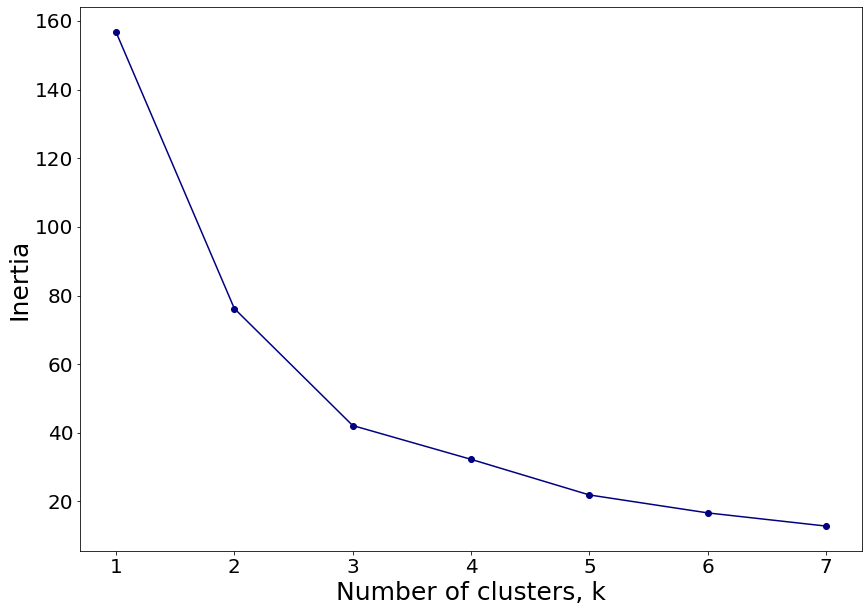

In [31]:
from sklearn.cluster import KMeans

plt.rcParams['figure.figsize'] = 14, 10
ks = range(1, 8)
inertias = []
Y_learn = pd.DataFrame(data = Y_sklearn)
for k in ks :
    # Create a KMeans instance with k clusters : model
    model = KMeans(n_clusters = k)
    
    # Fit model to samples
    model.fit(Y_learn.iloc[:,:])
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
plt.plot(ks, inertias, '-o', color = 'Navy')
plt.xlabel('Number of clusters, k', size = 25)
plt.ylabel('Inertia', size = 25)
plt.xticks(ks, size = 20)
plt.yticks(size = 20)
plt.show()

In [32]:
from sklearn.metrics import silhouette_score

sil = []
kmax = 10

# dissimilarity would not be defined for a single cluster, thus, minimum number of clusters should be 2
for k in range(2, kmax + 1) :
  kmeans = KMeans(n_clusters = k).fit(X)
  labels = kmeans.labels_
  sil.append(silhouette_score(X, labels, metric = 'euclidean'))

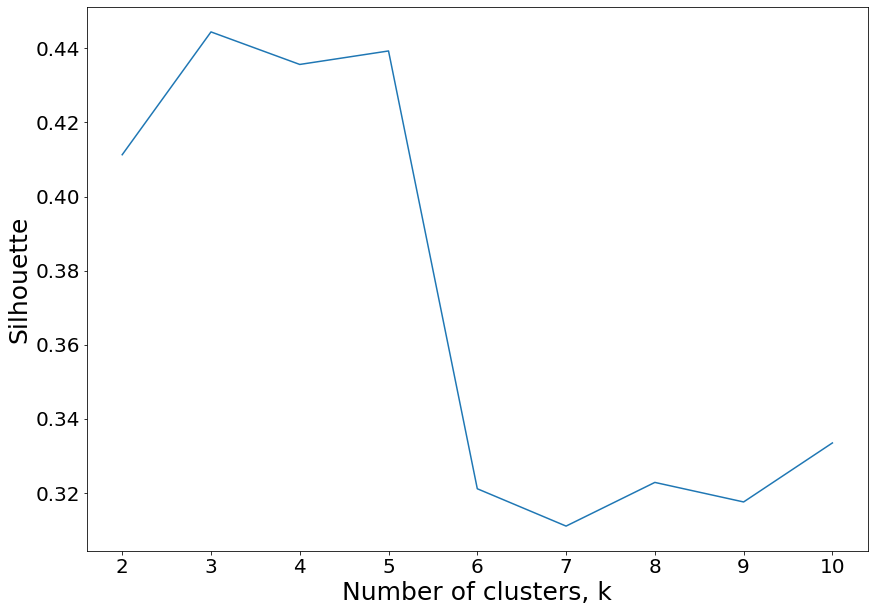

In [33]:
plt.xlabel('Number of clusters, k', size = 25)
plt.ylabel('Silhouette', size = 25)
plt.plot(range(2, kmax + 1), sil)
plt.xticks(range(2, kmax + 1),size = 20)
plt.yticks(size = 20)
plt.show()

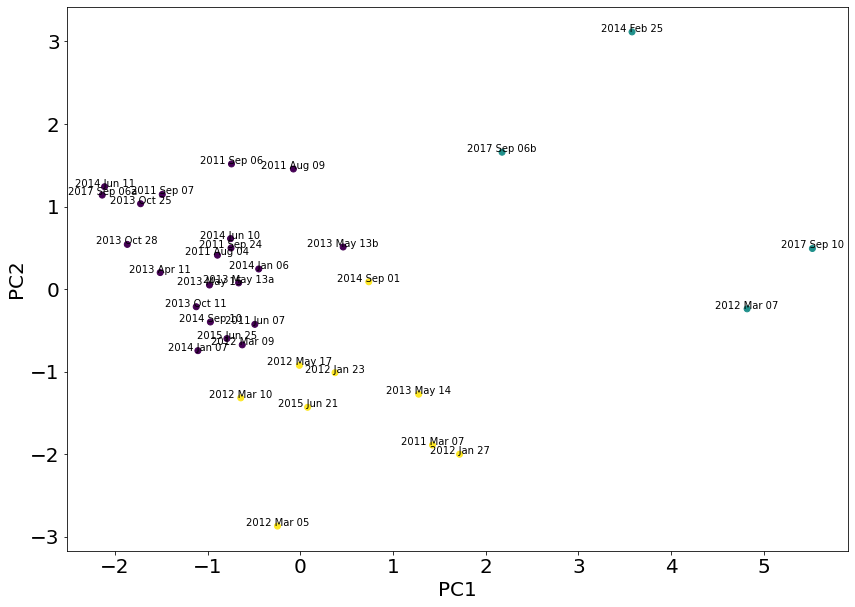

In [34]:
model = KMeans(n_clusters = 3)
model.fit(Y_learn.iloc[::])

labels = model.predict(Y_learn.iloc[::])
plt.scatter(Y_learn[0], Y_learn[1], c = labels)

i = 0
while i < len(name) : 
    plt.annotate(name[i], # this is the text
                 (XX[i],YY[i]), # this is the point to label
                 textcoords = "offset points", # how to position the text
                 xytext = (0,0), # distance from text to points (x,y)
                 ha = 'center')
    i += 1
pylab.xlabel(r'PC1', size = 20)
pylab.ylabel(r'PC2', size = 20)
pylab.xticks(size = 20)
pylab.yticks(size = 20)
plt.show()


Graph analysis

In [35]:
import sklearn
from sklearn import metrics
import networkx as nx

In [36]:
data = X

In [37]:
sim_cos_matrix = sklearn.metrics.pairwise.cosine_similarity(data, Y = None, dense_output = True)

In [38]:
print(np.mean(sim_cos_matrix), np.mean(sim_cos_matrix) + 0.5 * np.std(sim_cos_matrix), np.std(sim_cos_matrix))

0.8834836698433125 0.9560765723043745 0.145185804922124


In [39]:
threshold = 0.995 #0.984 #0.986

i = 0 
j = 0 
dic = {}
a = 0 
while i < len(sim_cos_matrix) :
    a += 1
    #print(sim_cos_matrix[i])
    while j < len(sim_cos_matrix[i]) :
        a += 1
        if sim_cos_matrix[i][j] < threshold : pass
        else :
            if i not in dic : dic[i] = [j]
            else : dic[i].append(j)
        j += 1
    j = 0 
    i += 1
    

In [40]:
def generate_edges(graph) :
    edges = []
    for node in graph :
        for neighbour in graph[node] :
            edges.append((node, neighbour))
        edges.remove((node, node))

    return edges

In [41]:
edges_dics = generate_edges(dic)
G = nx.Graph()

In [42]:
i = 0 
while i < len(data) :
    G.add_node(i)
    i += 1

In [43]:
G.add_edges_from(edges_dics)

In [44]:
print("Nodes of graph: ")
print(G.nodes())
print("Edges of graph: ")
print(G.edges())

Nodes of graph: 
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33]
Edges of graph: 
[(0, 1), (0, 14), (0, 17), (0, 19), (0, 23), (1, 8), (1, 14), (1, 15), (1, 17), (1, 19), (1, 23), (3, 32), (5, 6), (5, 25), (6, 16), (7, 17), (7, 18), (7, 21), (7, 23), (8, 13), (8, 23), (9, 11), (9, 12), (11, 12), (11, 28), (11, 29), (12, 28), (12, 29), (14, 19), (15, 17), (17, 23), (18, 21), (18, 23), (19, 23), (21, 27), (28, 29), (30, 31)]


In [45]:
i = 0 
label = {}
while i < len(name) :
    label[i] = name[i]
    i += 1

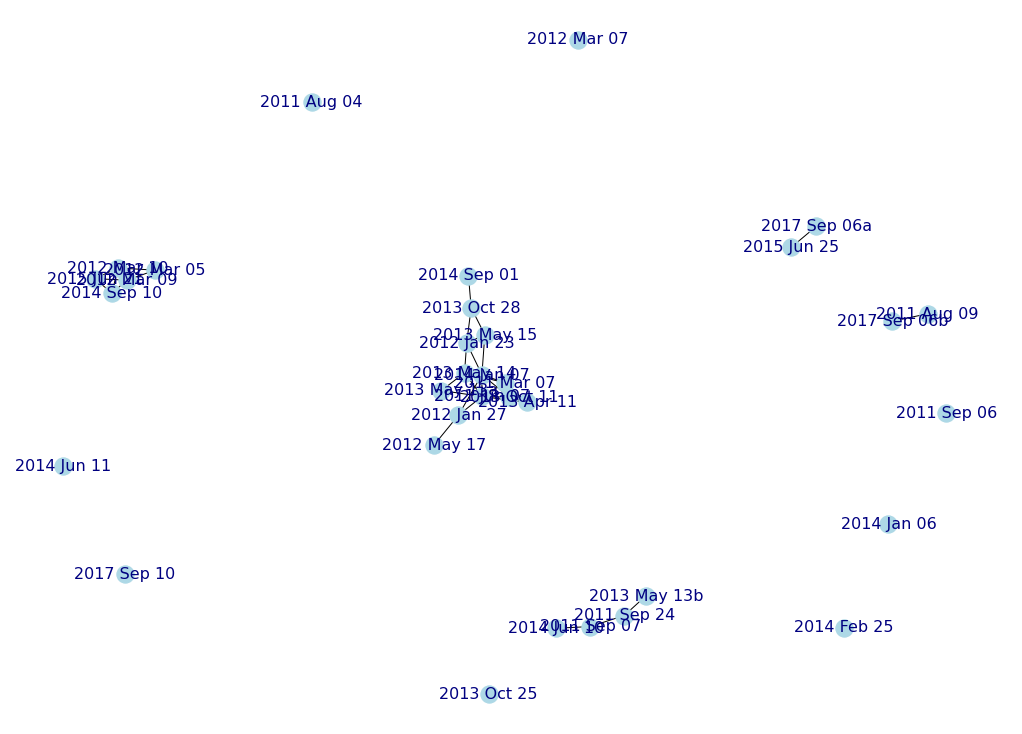

In [46]:
pos = nx.spring_layout(G)
nx.draw(G, pos, node_color = 'lightblue')
nx.draw_networkx_labels(G, pos, label, font_size = 16, font_color = 'navy')
plt.savefig("simple_path.png") # save as png
plt.show() # display

In [47]:
from networkx import node_connected_component

In [48]:
[len(c) for c in sorted(nx.connected_components(G), key = len, reverse = True)]

[13, 5, 4, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1]

In [49]:
for i, c in nx.clustering(G).items() : 
    print(name[i], ':', c)

2011 Mar 07 : 0.7
2011 Jun 07 : 0.42857142857142855
2011 Aug 04 : 0
2011 Aug 09 : 0
2011 Sep 06 : 0
2011 Sep 07 : 0
2011 Sep 24 : 0
2012 Jan 23 : 0.5
2012 Jan 27 : 0.3333333333333333
2012 Mar 05 : 1.0
2012 Mar 07 : 0
2012 Mar 09 : 0.6666666666666666
2012 Mar 10 : 0.6666666666666666
2012 May 17 : 0
2013 Apr 11 : 1.0
2013 May 13a : 1.0
2013 May 13b : 0
2013 May 14 : 0.5
2013 May 15 : 0.6666666666666666
2013 Oct 11 : 0.8333333333333334
2013 Oct 25 : 0
2013 Oct 28 : 0.3333333333333333
2014 Jan 06 : 0
2014 Jan 07 : 0.38095238095238093
2014 Feb 25 : 0
2014 Jun 10 : 0
2014 Jun 11 : 0
2014 Sep 01 : 0
2014 Sep 10 : 1.0
2015 Jun 21 : 1.0
2015 Jun 25 : 0
2017 Sep 06a : 0
2017 Sep 06b : 0
2017 Sep 10 : 0


In [50]:
components = nx.connected_components(G)
largest_component = max(components, key = len)

In [51]:
subgraph = G.subgraph(largest_component)
print(len(subgraph))
diameter = nx.diameter(subgraph)
print("Network diameter of largest component :", diameter)

13
Network diameter of largest component : 5


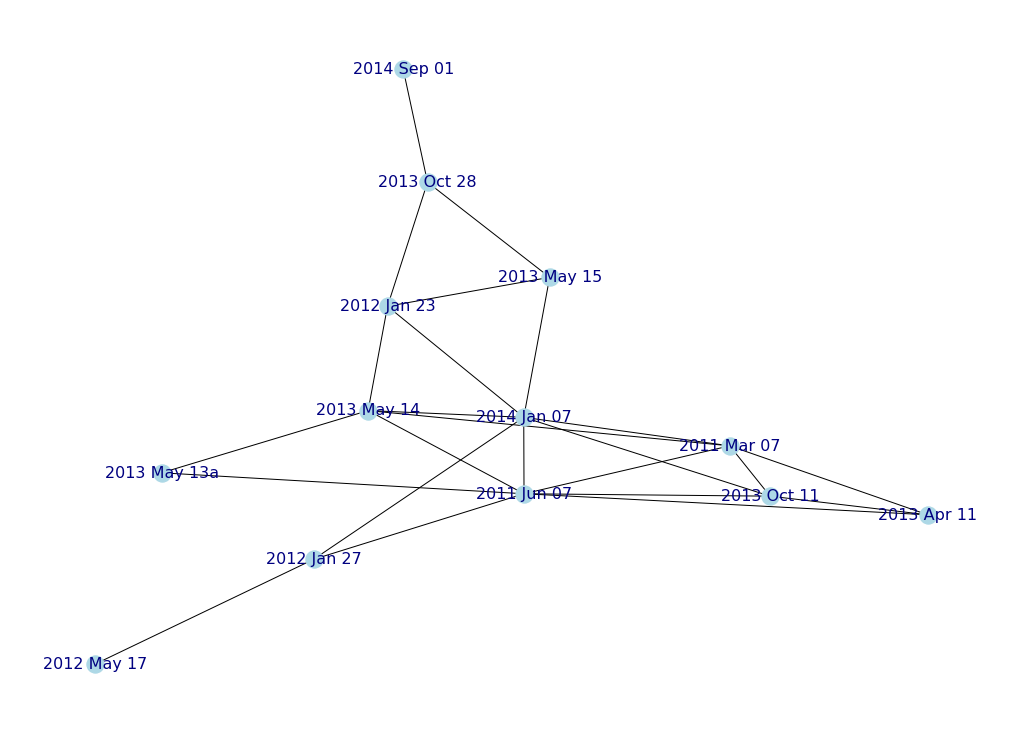

In [52]:
nx.draw(subgraph, pos, node_color = 'lightblue')
nx.draw_networkx_labels(subgraph, pos, label, font_size = 16, font_color = 'navy')
plt.savefig("simple_path.png") # save as png
#plt.show() # display

In [53]:
G.add_edges_from(edges_dics)
components = nx.connected_components(G)
G_sorted = sorted(nx.connected_components(G), key = len, reverse = True)

In [54]:
subgraph = G.subgraph(G_sorted[1])
print(len(subgraph))
diameter = nx.diameter(subgraph)
print("Network diameter of second largest component :", diameter)

5
Network diameter of second largest component : 2


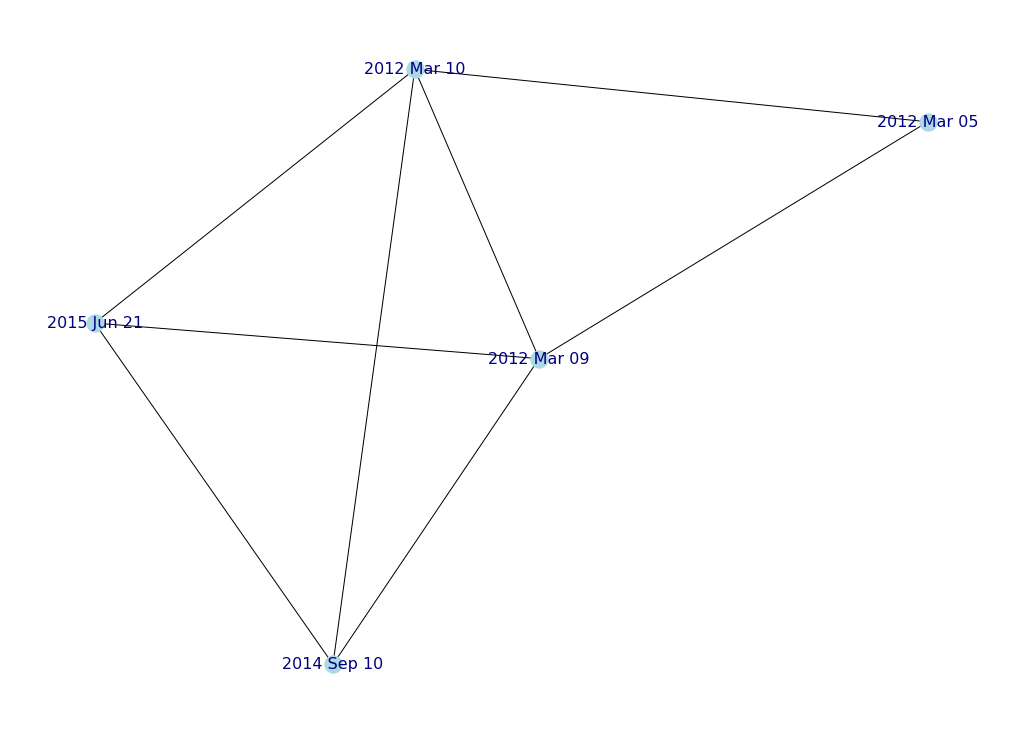

In [55]:
nx.draw(subgraph, pos, node_color = 'lightblue')
nx.draw_networkx_labels(subgraph, pos, label, font_size = 16, font_color = 'navy')
plt.savefig("simple_path.png") # save as png
#plt.show() # display

In [56]:
G.add_edges_from(edges_dics)
components = nx.connected_components(G)
G_sorted = sorted(nx.connected_components(G), key = len, reverse = True)

In [57]:
subgraph = G.subgraph(G_sorted[2])
print(len(subgraph))
diameter = nx.diameter(subgraph)
print("Network diameter of third largest component :", diameter)

4
Network diameter of third largest component : 3


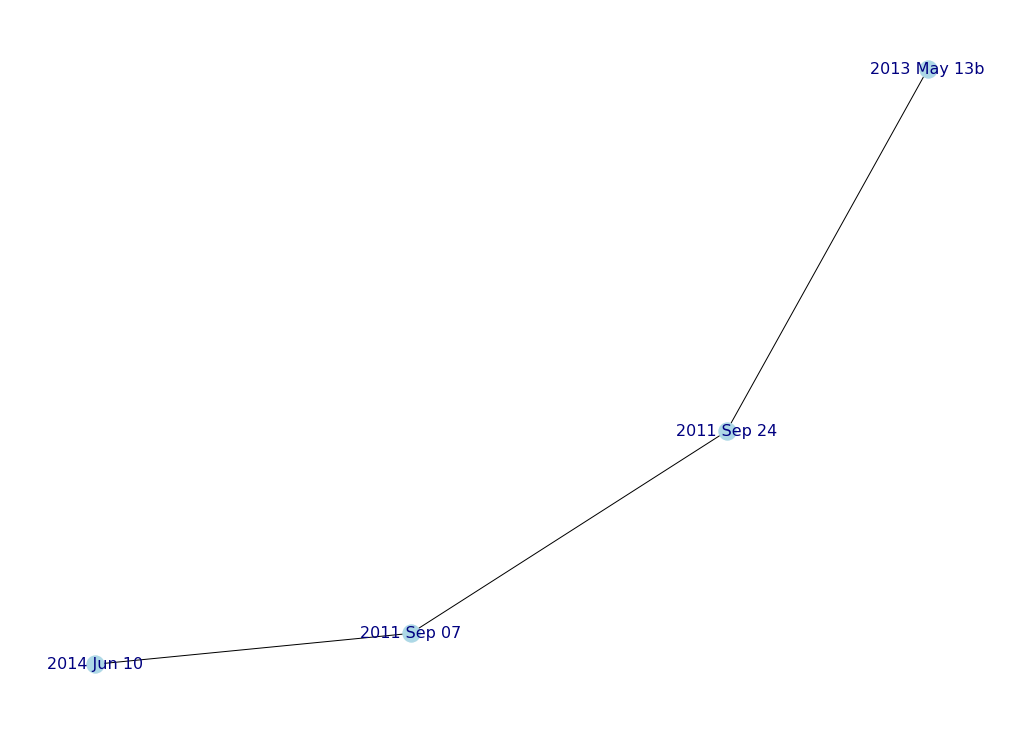

In [58]:
nx.draw(subgraph, pos, node_color = 'lightblue')
nx.draw_networkx_labels(subgraph, pos, label, font_size = 16, font_color = 'navy')
plt.savefig("simple_path.png") # save as png
#plt.show() # display

In [59]:
G.add_edges_from(edges_dics)
components = nx.connected_components(G)
G_sorted = sorted(nx.connected_components(G), key = len, reverse = True)
subgraph_1 = G.subgraph(G_sorted[0])
print(len(subgraph_1))
diameter = nx.diameter(subgraph_1)
print("Network diameter of largest component :", diameter)

subgraph_2 = G.subgraph(G_sorted[1])
print(len(subgraph_2))
diameter = nx.diameter(subgraph_2)
print("Network diameter of second largest component :", diameter)
subgraph_3 = G.subgraph(G_sorted[2])
print(len(subgraph_3))
diameter = nx.diameter(subgraph_3)
print("Network diameter of third largest component :", diameter)
subgraph_4 = G.subgraph(G_sorted[3])
print(len(subgraph_4))
diameter = nx.diameter(subgraph_4)
print("Network diameter of fourth largest component :", diameter)
subgraph_5 = G.subgraph(G_sorted[4])
print(len(subgraph_5))
diameter = nx.diameter(subgraph_5)
print("Network diameter of fifth largest component :", diameter)

13
Network diameter of largest component : 5
5
Network diameter of second largest component : 2
4
Network diameter of third largest component : 3
2
Network diameter of fourth largest component : 1
2
Network diameter of fifth largest component : 1


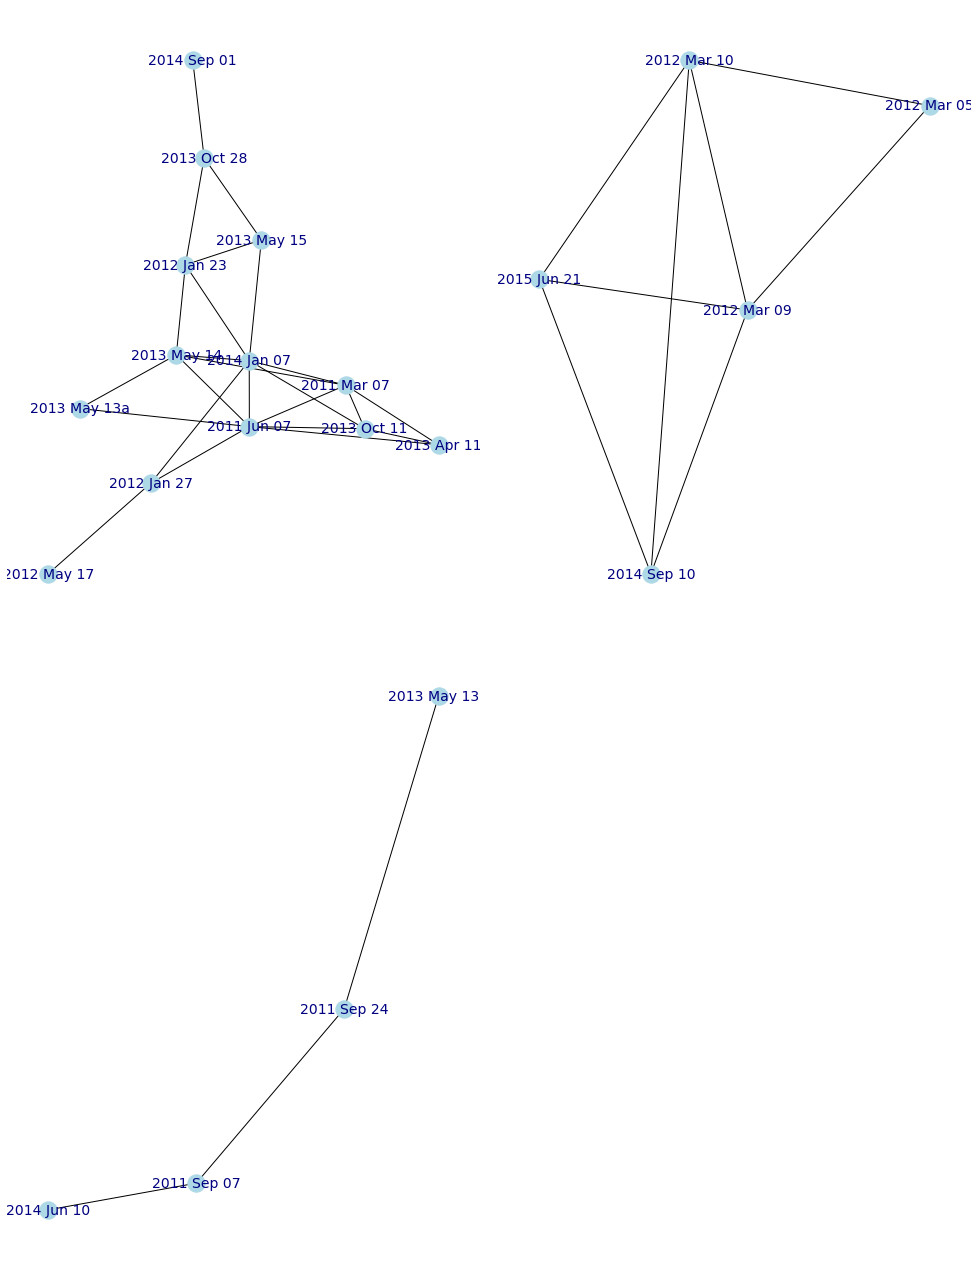

In [60]:
pylab.rcParams['figure.figsize'] = 14,18
mpl.rcParams['axes.linewidth'] = 0.01
plt.tight_layout()
plt.subplot(221)
plt.tight_layout()
nx.draw(subgraph_1, pos, node_color = 'lightblue')
nx.draw_networkx_labels(subgraph_1, pos, label, font_size = 14, font_color = 'navy')
plt.subplot(222)
plt.tight_layout()
nx.draw(subgraph_2, pos, node_color = 'lightblue')
nx.draw_networkx_labels(subgraph_2, pos, label, font_size = 14, font_color = 'navy')
plt.subplot(223)
plt.tight_layout()
nx.draw(subgraph_3, pos, node_color = 'lightblue')
nx.draw_networkx_labels(subgraph_3, pos, label, font_size = 14, font_color = 'navy')
#plt.subplot(224)
#plt.tight_layout()
#nx.draw(subgraph_4,pos, node_color = 'lightblue', alpha = 0.5,)
#nx.draw_networkx_labels(subgraph_4,pos,label,font_size=7.5,  color = 'mediumblue')
plt.savefig("simple_path.png") # save as png

Threshold optimization 

In [61]:
alpha = 0 
THRESHOLD = []
LEN = []
LEN_2 = []
LEN_3 = []
LEN_12 = []
LEN_123 = []
THRESHOLD_2 = []
THRESHOLD_3 = []
threshold = 0 
while threshold < 1 :
    threshold = (np.mean(sim_cos_matrix) / 2) + alpha * np.std(sim_cos_matrix)
    i = 0 
    j = 0 
    dic = {}
    a = 0 
    while i < len(sim_cos_matrix) :
        a += 1
        #print(sim_cos_matrix[i])
        while j < len(sim_cos_matrix[i]) :
            a += 1
            if sim_cos_matrix[i][j] < threshold : pass
            else :
                if i not in dic : dic[i] = [j]
                else : dic[i].append(j)
            j += 1
        j = 0 
        i += 1
    edges_dics = generate_edges(dic)
    G = nx.Graph()
    i = 0 
    while i < len(data) :
        G.add_node(i)
        i += 1
    G.add_edges_from(edges_dics)
    components = nx.connected_components(G)
    G_sorted = sorted(nx.connected_components(G), key = len, reverse = True)
    if len(G_sorted) > 2 :
        #print(len(G_sorted[1]))
        LEN_3.append(len(G_sorted[2]))
        LEN_2.append(len(G_sorted[1]))
        LEN_12.append(len(G_sorted[0]) + len(G_sorted[1]))
        LEN_123.append(len(G_sorted[0]) + len(G_sorted[1]) + len(G_sorted[2]))
        #print(threshold, len(G_sorted[1]))
        THRESHOLD_2.append(threshold)
        THRESHOLD_3.append(threshold)
        #print(G_sorted)
    largest_component = max(components, key = len)
    subgraph = G.subgraph(largest_component)
    
    
    LEN.append(len(subgraph))
    THRESHOLD.append(threshold)
    alpha += 0.01
       

(array([ 0.,  5., 10., 15., 20., 25., 30., 35.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

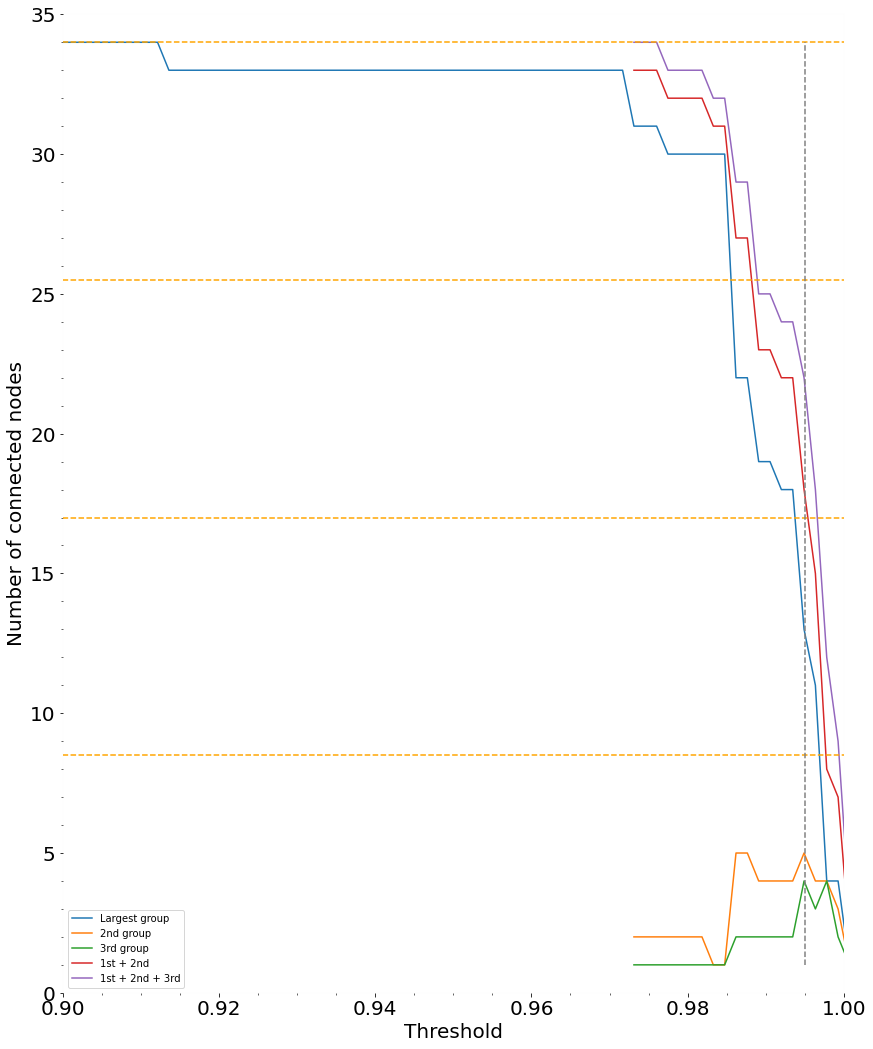

In [62]:
plt.plot(THRESHOLD, LEN, label = 'Largest group')
plt.plot(THRESHOLD_2, LEN_2, label = '2nd group')
plt.plot(THRESHOLD_3, LEN_3, label = '3rd group')
plt.plot(THRESHOLD_2, LEN_12, label = '1st + 2nd')
plt.plot(THRESHOLD_3, LEN_123, label = '1st + 2nd + 3rd')
plt.plot([min(THRESHOLD), max(THRESHOLD)], [len(G.nodes), len(G.nodes)], linestyle = '--', color = 'orange')
plt.plot([min(THRESHOLD), max(THRESHOLD)], [3 * len(G.nodes) / 4, 3 * len(G.nodes) / 4], linestyle = '--', color = 'orange')
plt.plot([min(THRESHOLD), max(THRESHOLD)], [len(G.nodes) / 2, len(G.nodes) / 2], linestyle = '--', color = 'orange')
plt.plot([min(THRESHOLD), max(THRESHOLD)], [len(G.nodes) / 4, len(G.nodes) / 4], linestyle = '--', color = 'orange')
plt.plot([0.995, 0.995], [min(LEN), max(LEN)], linestyle = '--', color = 'grey')
v = [0.9, 1, 0, 35]
axis(v)
plt.minorticks_on()
plt.legend()
pylab.xlabel(r'Threshold', size = 20)
pylab.ylabel(r'Number of connected nodes', size = 20)
pylab.xticks(size = 20)
pylab.yticks(size = 20)

In [63]:
i = 0 
while i < len(THRESHOLD_2) :
    print('Threshold :', THRESHOLD_2[i], ', Size of 2nd group :', LEN_2[i], ', Size of 3rd group :', LEN_3[i])
    i += 1

Threshold : 0.9731218809366251 , Size of 2nd group : 2 , Size of 3rd group : 1
Threshold : 0.9745737389858464 , Size of 2nd group : 2 , Size of 3rd group : 1
Threshold : 0.9760255970350675 , Size of 2nd group : 2 , Size of 3rd group : 1
Threshold : 0.9774774550842886 , Size of 2nd group : 2 , Size of 3rd group : 1
Threshold : 0.97892931313351 , Size of 2nd group : 2 , Size of 3rd group : 1
Threshold : 0.980381171182731 , Size of 2nd group : 2 , Size of 3rd group : 1
Threshold : 0.9818330292319524 , Size of 2nd group : 2 , Size of 3rd group : 1
Threshold : 0.9832848872811735 , Size of 2nd group : 1 , Size of 3rd group : 1
Threshold : 0.9847367453303948 , Size of 2nd group : 1 , Size of 3rd group : 1
Threshold : 0.9861886033796159 , Size of 2nd group : 5 , Size of 3rd group : 2
Threshold : 0.9876404614288372 , Size of 2nd group : 5 , Size of 3rd group : 2
Threshold : 0.9890923194780583 , Size of 2nd group : 4 , Size of 3rd group : 2
Threshold : 0.9905441775272796 , Size of 2nd group : 4 

Euclidian distance

In [64]:
sim_euclidian = sklearn.metrics.pairwise.euclidean_distances(data, Y = None)
print(np.mean(sim_euclidian), np.mean(sim_euclidian) + 0.5 * np.std(sim_euclidian), np.std(sim_euclidian))

2398.867630662208 3282.0722214901016 1766.4091816557877


In [65]:
threshold = 600 #720
i = 0 
j = 0 
dic = {}
a = 0 
while i < len(sim_euclidian) :
    a += 1
    #print(sim_cos_matrix[i])
    while j < len(sim_euclidian[i]) :
        a += 1
        if sim_euclidian[i][j] > threshold : pass
        else :            
            if i not in dic : dic[i] = [j]
            else : dic[i].append(j)
        j += 1
    j = 0 
    i += 1
    

In [66]:
def generate_edges(graph) :
    edges = []
    for node in graph:
        for neighbour in graph[node] :
            edges.append((node, neighbour))
        if (node, node) in edges :
            edges.remove((node, node))

    return edges

In [67]:
edges_dics = generate_edges(dic)
G = nx.Graph()

In [68]:
i = 0 
while i < len(data) :
    G.add_node(i)
    i += 1

In [69]:
G.add_edges_from(edges_dics)

In [70]:
print("Nodes of graph: ")
print(G.nodes())
print("Edges of graph: ")
print(G.edges())

Nodes of graph: 
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33]
Edges of graph: 
[(1, 15), (1, 19), (2, 3), (2, 32), (3, 32), (4, 5), (4, 26), (5, 20), (5, 21), (5, 26), (6, 16), (6, 25), (7, 23), (11, 28), (12, 29), (14, 15), (14, 18), (15, 18), (15, 19), (16, 25), (18, 27), (20, 21), (20, 31), (21, 31)]


In [71]:
i = 0 
label = {}
while i < len(name) :
    label[i] = name[i]
    i += 1

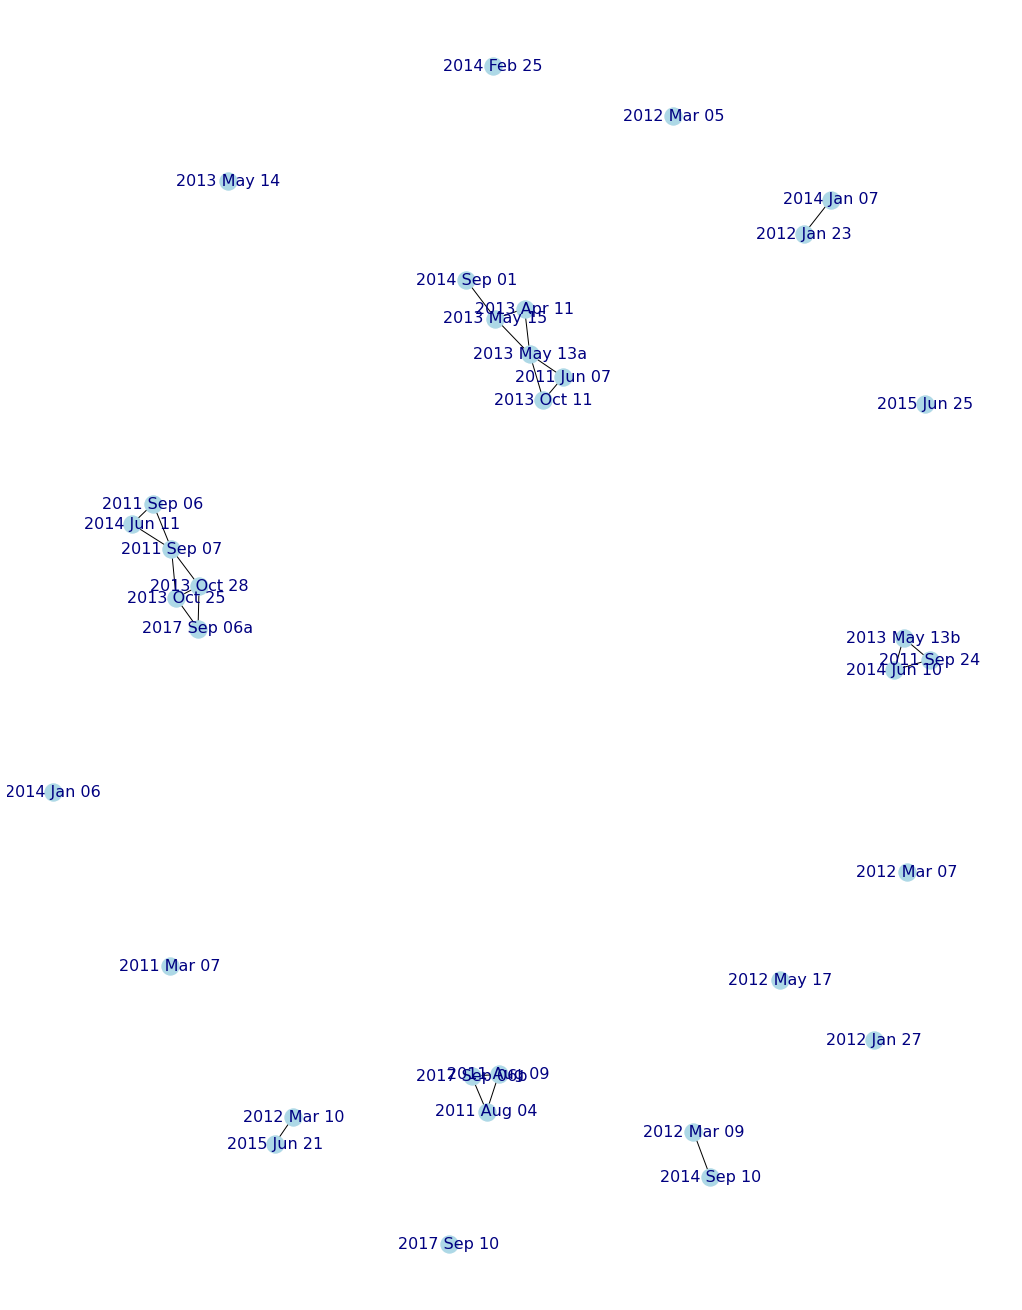

In [72]:
pos = nx.spring_layout(G)
nx.draw(G, pos, node_color = 'lightblue')
nx.draw_networkx_labels(G, pos, label, font_size = 16, font_color = 'navy')
plt.savefig("simple_path.png") # save as png
plt.show() # display

In [73]:
[len(c) for c in sorted(nx.connected_components(G), key = len, reverse = True)]

[6, 6, 3, 3, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

In [74]:
for i, c in nx.clustering(G).items() : 
    print(name[i], ':', c)

2011 Mar 07 : 0
2011 Jun 07 : 1.0
2011 Aug 04 : 1.0
2011 Aug 09 : 1.0
2011 Sep 06 : 1.0
2011 Sep 07 : 0.3333333333333333
2011 Sep 24 : 1.0
2012 Jan 23 : 0
2012 Jan 27 : 0
2012 Mar 05 : 0
2012 Mar 07 : 0
2012 Mar 09 : 0
2012 Mar 10 : 0
2012 May 17 : 0
2013 Apr 11 : 1.0
2013 May 13a : 0.3333333333333333
2013 May 13b : 1.0
2013 May 14 : 0
2013 May 15 : 0.3333333333333333
2013 Oct 11 : 1.0
2013 Oct 25 : 0.6666666666666666
2013 Oct 28 : 0.6666666666666666
2014 Jan 06 : 0
2014 Jan 07 : 0
2014 Feb 25 : 0
2014 Jun 10 : 1.0
2014 Jun 11 : 1.0
2014 Sep 01 : 0
2014 Sep 10 : 0
2015 Jun 21 : 0
2015 Jun 25 : 0
2017 Sep 06a : 1.0
2017 Sep 06b : 1.0
2017 Sep 10 : 0


In [75]:
components = nx.connected_components(G)
largest_component = max(components, key = len)

In [76]:
subgraph = G.subgraph(largest_component)
print(len(subgraph))
diameter = nx.diameter(subgraph)
print("Network diameter of largest component :", diameter)

6
Network diameter of largest component : 3


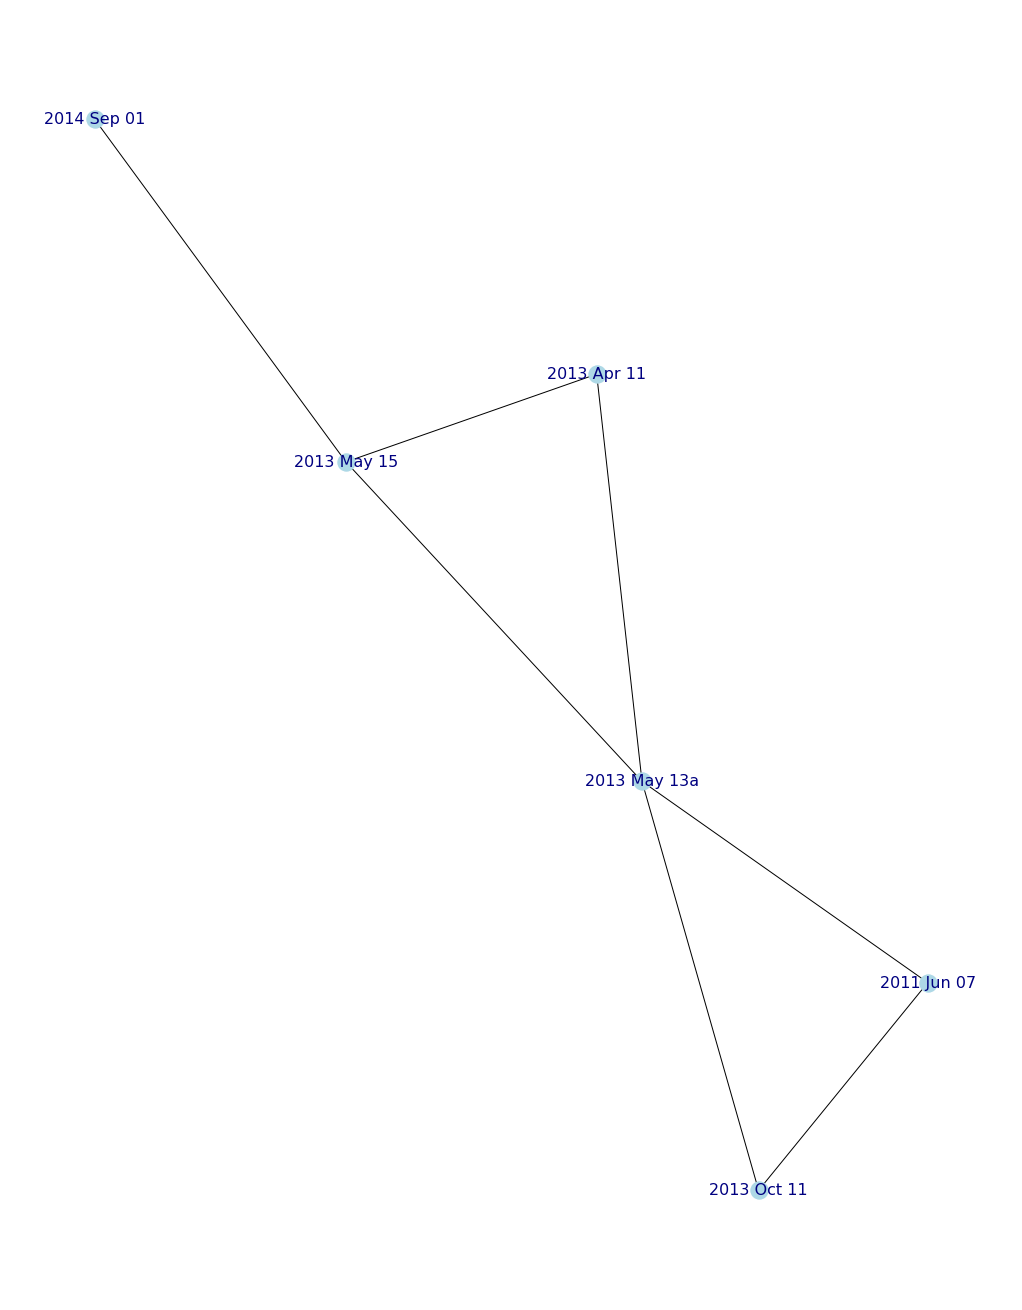

In [77]:
nx.draw(subgraph, pos, node_color = 'lightblue')
nx.draw_networkx_labels(subgraph, pos, label, font_size = 16, font_color = 'navy')
plt.savefig("simple_path.png") # save as png
#plt.show() # display

In [78]:
G.add_edges_from(edges_dics)
components = nx.connected_components(G)
G_sorted = sorted(nx.connected_components(G), key = len, reverse = True)

In [79]:
subgraph = G.subgraph(G_sorted[1])
print(len(subgraph))
diameter = nx.diameter(subgraph)
print("Network diameter of second largest component :", diameter)

6
Network diameter of second largest component : 3


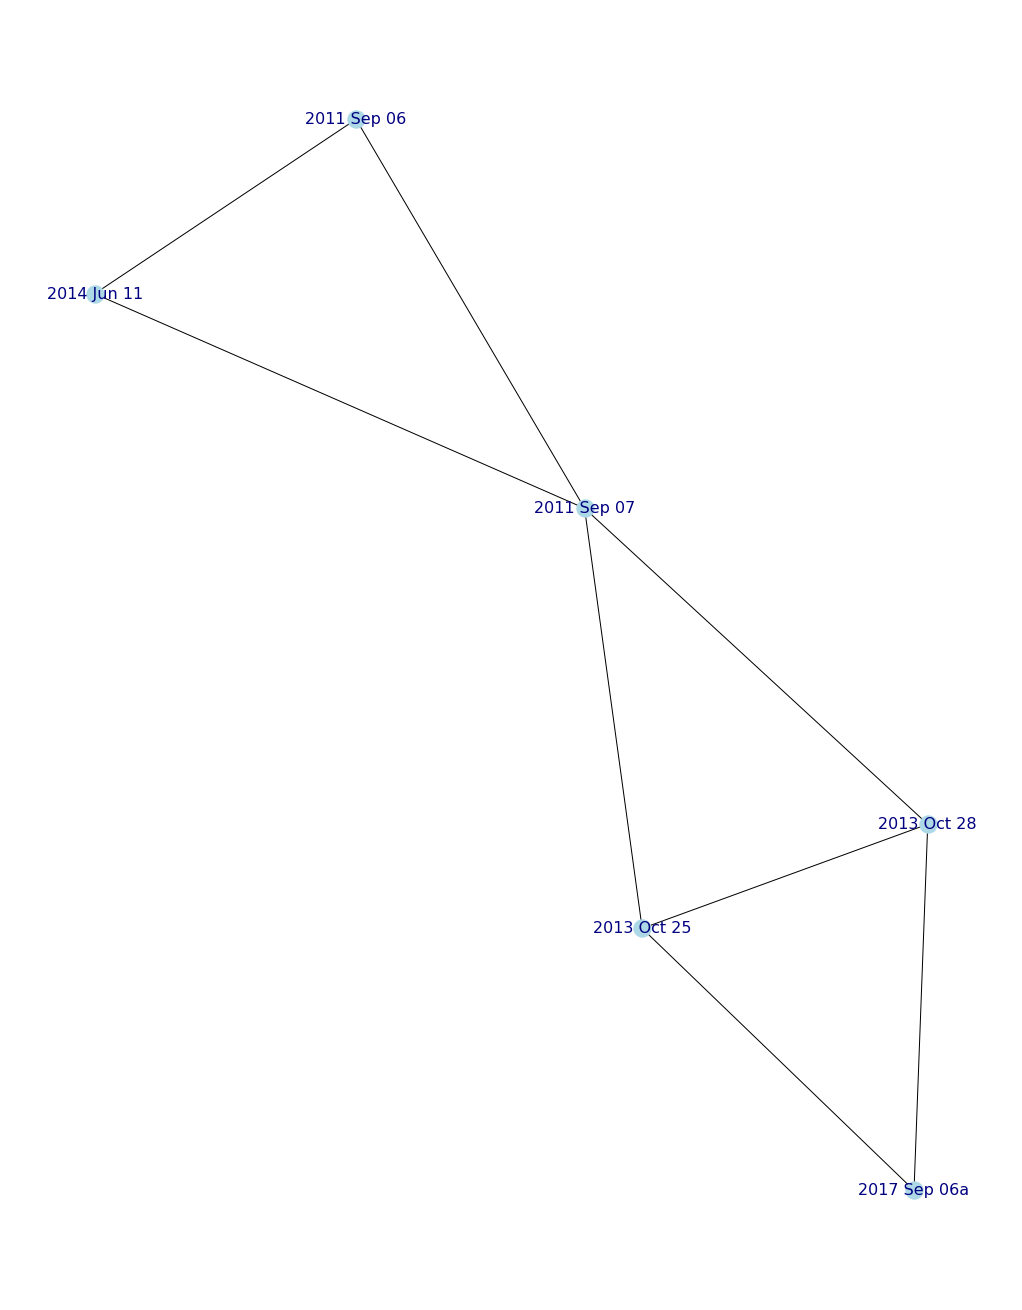

In [80]:
nx.draw(subgraph, pos, node_color = 'lightblue')
nx.draw_networkx_labels(subgraph, pos, label, font_size = 16, font_color = 'navy')
plt.savefig("simple_path.png") # save as png
#plt.show() # display

In [81]:
G.add_edges_from(edges_dics)
components = nx.connected_components(G)
G_sorted = sorted(nx.connected_components(G), key = len, reverse = True)

In [82]:
subgraph = G.subgraph(G_sorted[2])
print(len(subgraph))
diameter = nx.diameter(subgraph)
print("Network diameter of third largest component :", diameter)

3
Network diameter of third largest component : 1


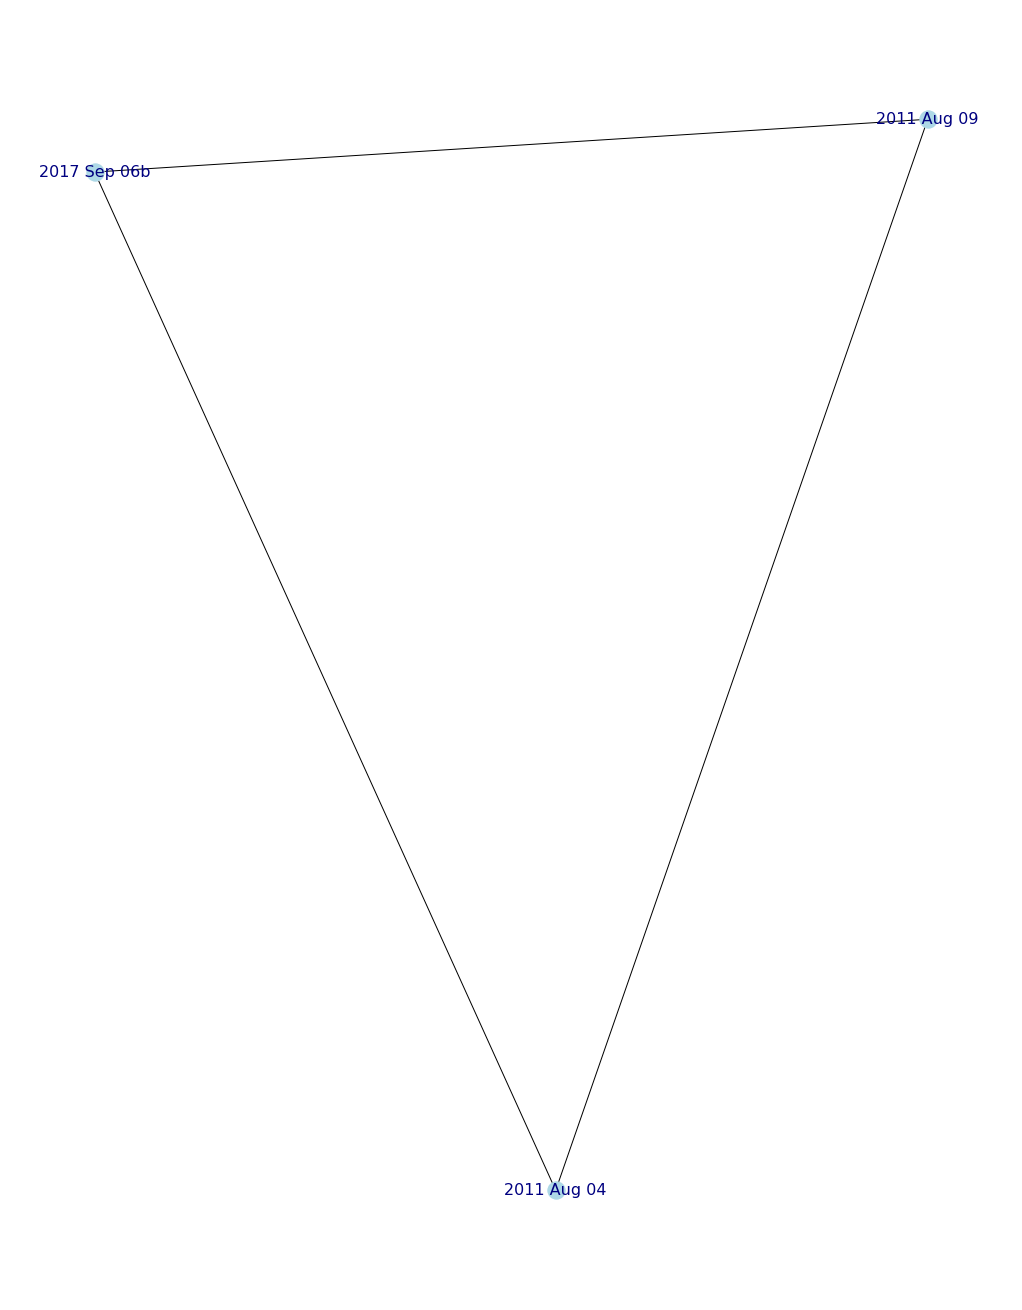

In [83]:
nx.draw(subgraph, pos, node_color = 'lightblue')
nx.draw_networkx_labels(subgraph, pos, label, font_size = 16, font_color = 'navy')
plt.savefig("simple_path.png") # save as png
#plt.show() # display

In [84]:
G.add_edges_from(edges_dics)
components = nx.connected_components(G)
G_sorted = sorted(nx.connected_components(G), key = len, reverse = True)
subgraph_1 = G.subgraph(G_sorted[0])
print(len(subgraph_1))
diameter = nx.diameter(subgraph_1)
print("Network diameter of largest component :", diameter)

subgraph_2 = G.subgraph(G_sorted[1])
print(len(subgraph_2))
diameter = nx.diameter(subgraph_2)
print("Network diameter of second largest component :", diameter)
subgraph_3 = G.subgraph(G_sorted[2])
print(len(subgraph_3))
diameter = nx.diameter(subgraph_3)
print("Network diameter of third largest component :", diameter)
subgraph_4 = G.subgraph(G_sorted[3])
print(len(subgraph_4))
diameter = nx.diameter(subgraph_4)
print("Network diameter of fourth largest component :", diameter)
subgraph_5 = G.subgraph(G_sorted[4])
print(len(subgraph_5))
diameter = nx.diameter(subgraph_5)
print("Network diameter of fifth largest component :", diameter)

6
Network diameter of largest component : 3
6
Network diameter of second largest component : 3
3
Network diameter of third largest component : 1
3
Network diameter of fourth largest component : 1
2
Network diameter of fifth largest component : 1


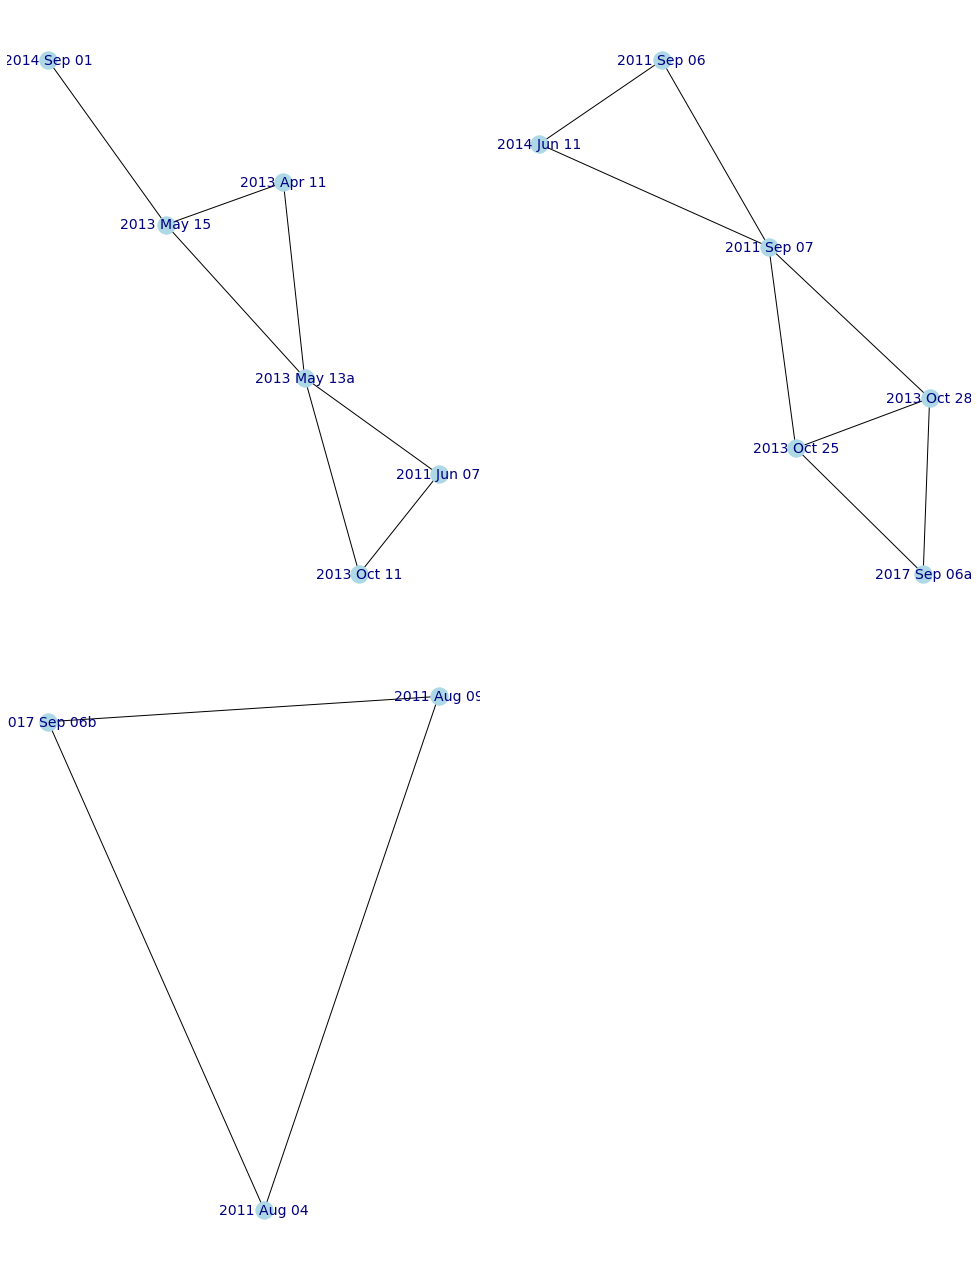

In [85]:
pylab.rcParams['figure.figsize'] = 14,18
mpl.rcParams['axes.linewidth'] = 0.01
plt.tight_layout()
plt.subplot(221)
plt.tight_layout()
nx.draw(subgraph_1, pos, node_color = 'lightblue')
nx.draw_networkx_labels(subgraph_1, pos, label, font_size = 14, font_color = 'navy')
plt.subplot(222)
plt.tight_layout()
nx.draw(subgraph_2, pos, node_color = 'lightblue')
nx.draw_networkx_labels(subgraph_2, pos, label, font_size = 14, font_color = 'navy')
plt.subplot(223)
plt.tight_layout()
nx.draw(subgraph_3, pos, node_color = 'lightblue')
nx.draw_networkx_labels(subgraph_3, pos, label, font_size = 14, font_color = 'navy')
#plt.subplot(224)
#plt.tight_layout()
#nx.draw(subgraph_4,pos, node_color = 'lightblue', alpha = 0.5,)
#nx.draw_networkx_labels(subgraph_4,pos,label,font_size=7.5,  color = 'mediumblue')
plt.savefig("simple_path.png") # save as png

In [86]:
alpha = 0 
THRESHOLD = []
LEN = []
LEN_2 = []
LEN_3 = []
LEN_12 = []
LEN_123 = []
THRESHOLD_2 = []
THRESHOLD_3 = []
threshold = 100000 
while threshold > 100 :
    threshold = np.mean(sim_euclidian) - alpha * np.std(sim_euclidian)
    i = 0 
    j = 0 
    dic = {}
    a = 0 
    while i < len(sim_euclidian) :
        a += 1
        while j < len(sim_euclidian[i]) :
            a += 1
            if sim_euclidian[i][j] > threshold : pass
            else :
                if i not in dic : dic[i] = [j]
                else : dic[i].append(j)
            j += 1
        j = 0 
        i += 1
    edges_dics = generate_edges(dic)
    G = nx.Graph()
    i = 0 
    while i < len(data) :
        G.add_node(i)
        i += 1
    G.add_edges_from(edges_dics)
    components = nx.connected_components(G)
    G_sorted = sorted(nx.connected_components(G), key = len, reverse = True)
    if len(G_sorted) > 2 :
        #print(len(G_sorted[1]))
        LEN_3.append(len(G_sorted[2]))
        LEN_2.append(len(G_sorted[1]))
        LEN_12.append(len(G_sorted[0]) + len(G_sorted[1]))
        LEN_123.append(len(G_sorted[0]) + len(G_sorted[1]) + len(G_sorted[2]))
        #print(threshold, len(G_sorted[1]))
        THRESHOLD_2.append(threshold)
        THRESHOLD_3.append(threshold)
        #print(G_sorted)
    largest_component = max(components, key = len)
    subgraph = G.subgraph(largest_component)
    
    
    LEN.append(len(subgraph))
    THRESHOLD.append(threshold)
    alpha += 0.01
       
#print(LEN)

(array([-5.,  0.,  5., 10., 15., 20., 25., 30., 35., 40.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

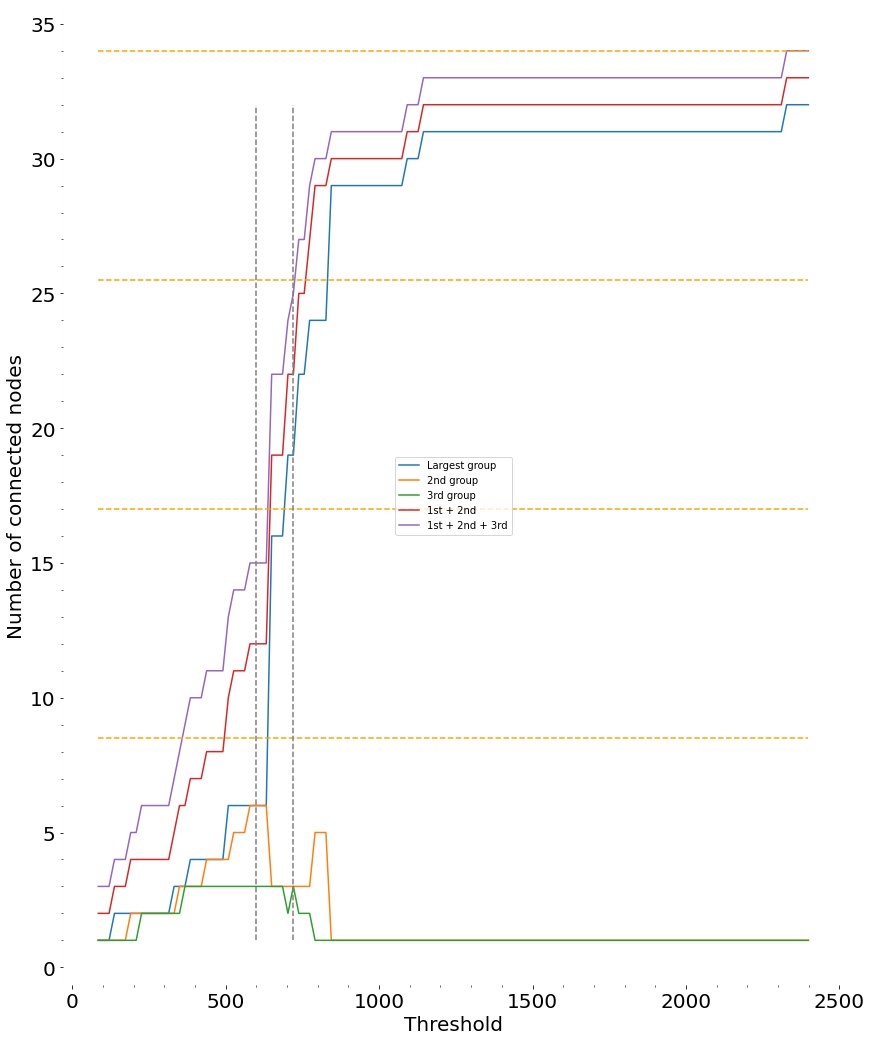

In [87]:
plt.plot(THRESHOLD, LEN, label = 'Largest group')
plt.plot(THRESHOLD_2, LEN_2, label = '2nd group')
plt.plot(THRESHOLD_3, LEN_3, label = '3rd group')
plt.plot(THRESHOLD_2, LEN_12, label = '1st + 2nd')
plt.plot(THRESHOLD_3, LEN_123, label = '1st + 2nd + 3rd')
plt.plot([min(THRESHOLD), max(THRESHOLD)], [len(G.nodes), len(G.nodes)], linestyle = '--', color = 'orange')
plt.plot([min(THRESHOLD), max(THRESHOLD)], [3 * len(G.nodes) / 4, 3 * len(G.nodes) / 4], linestyle = '--', color = 'orange')
plt.plot([min(THRESHOLD), max(THRESHOLD)], [len(G.nodes) / 2, len(G.nodes) / 2], linestyle = '--', color = 'orange')
plt.plot([min(THRESHOLD), max(THRESHOLD)], [len(G.nodes) / 4, len(G.nodes) / 4], linestyle = '--', color = 'orange')
plt.plot([720, 720], [min(LEN), max(LEN)], linestyle = '--', color = 'grey')
plt.plot([600, 600], [min(LEN), max(LEN)], linestyle = '--', color = 'grey')
plt.minorticks_on()
plt.legend()
pylab.xlabel(r'Threshold', size = 20)
pylab.ylabel(r'Number of connected nodes', size = 20)
pylab.xticks(size = 20)
pylab.yticks(size = 20)

In [88]:
i = 0 
while i < len(THRESHOLD_2) :
    print('Threshold :', THRESHOLD_2[i], ', Size of 2nd group :', LEN_2[i], ', Size of 3rd group :', LEN_3[i])
    i += 1

Threshold : 2398.867630662208 , Size of 2nd group : 1 , Size of 3rd group : 1
Threshold : 2381.2035388456497 , Size of 2nd group : 1 , Size of 3rd group : 1
Threshold : 2363.539447029092 , Size of 2nd group : 1 , Size of 3rd group : 1
Threshold : 2345.875355212534 , Size of 2nd group : 1 , Size of 3rd group : 1
Threshold : 2328.2112633959764 , Size of 2nd group : 1 , Size of 3rd group : 1
Threshold : 2310.5471715794183 , Size of 2nd group : 1 , Size of 3rd group : 1
Threshold : 2292.8830797628607 , Size of 2nd group : 1 , Size of 3rd group : 1
Threshold : 2275.2189879463026 , Size of 2nd group : 1 , Size of 3rd group : 1
Threshold : 2257.554896129745 , Size of 2nd group : 1 , Size of 3rd group : 1
Threshold : 2239.890804313187 , Size of 2nd group : 1 , Size of 3rd group : 1
Threshold : 2222.2267124966293 , Size of 2nd group : 1 , Size of 3rd group : 1
Threshold : 2204.562620680071 , Size of 2nd group : 1 , Size of 3rd group : 1
Threshold : 2186.898528863513 , Size of 2nd group : 1 , Si